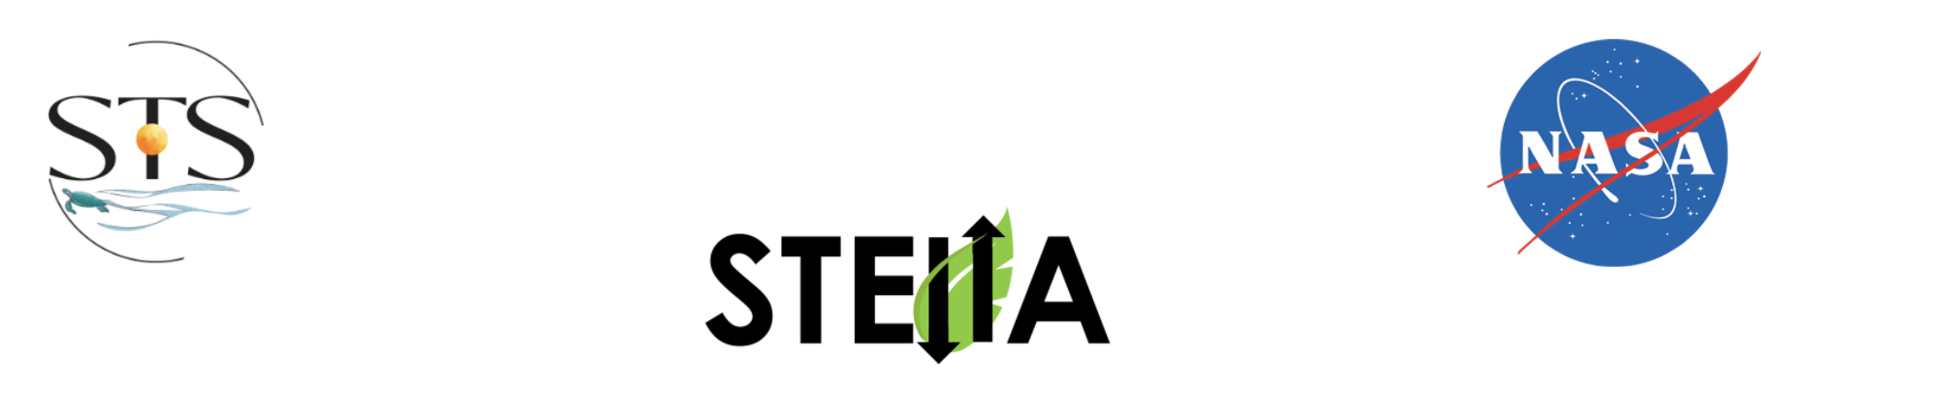


# Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer

The **Science and Technology Society (STS) of Sarasota-Manatee Counties, Florida** is working with the NASA STELLA (Science and Technology Education for Land/Life Assessment) outreach program as a part of our STEM initiative. According to their site, 

- "NASA STELLA instruments are portable low-cost do-it-yourself (DIY) instruments that support science education, and outreach through scientific engagement, inquiry, and discovery while helping you understand Landsat better". 

**STELLA instruments are developed under the influence and inspiration of Landsat.** This alignment not only fulfills our project needs but also serves as a compelling addition to our STEAM initiatives:

1) To train the minds young Floridians to be more aware of our wetlands, to care for them and about them.  Our program will bring more community publicity to the issue of wetlands change, as well.

2) To expose our middle- and high- school aged students to real science, using real data.  That means how to use instrumentation and understand how the data is collected, and how the data can be used in the real world.  It means not only to create beautiful charts and images that form the good results, but also to understand that data must be collected in a proper and reproducible way, that there physics reasons for lack of accuracy and lack of precision that one must understand and minimize in order to achieve meaningful results.


The NASA STELLA-Q2 is capable of making 18 different spectral measurements from the violet/blue portions of the electromagnetic spectrum out to near infrared regions (beyond our range of vision).The following figure **(1)** shows the visible spectrum by wavelength, and the yellow box indicates the STELLA-Q2 frequency range. 

>![image](Spectrum.png)


More can be found on the STELLA DIY instruments at the following link.

>https://landsat.gsfc.nasa.gov/stella/

The following is a sample-by-sample animation of the type of data acquired from STELLA-Q2 Spectrometer built by STS. STS is providing the python code in a Jupyter Notebook that can be used as an example of how to display the data from the STELLA-Q2 device. We have also provided some sample data to be used with this notebook. It should be noted that we did change the name of some of the headers created from our instrument to add colors to each of the wavelength reading that are made in order to display each wavelength as a corresponding color. The near infrared wavelength readings are colored in grays, wheat and gold where the normal visible spectrum colors are in vivid colors that they represent. 

>
>![image](STELLA_color.gif)
>
---


### Load Python requirments:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import ipywidgets as widgets
from IPython.display import display

#import altair as alt
####import panel as pn
#pn.extension('vega')
#pn.extension('tabulator')
#####pn.extension(sizing_mode = 'stretch_width')
#######alt.data_transformers.disable_max_rows()

---
---

# Test 6: Front Yard Image

Sunny day with shady spots in front yard.

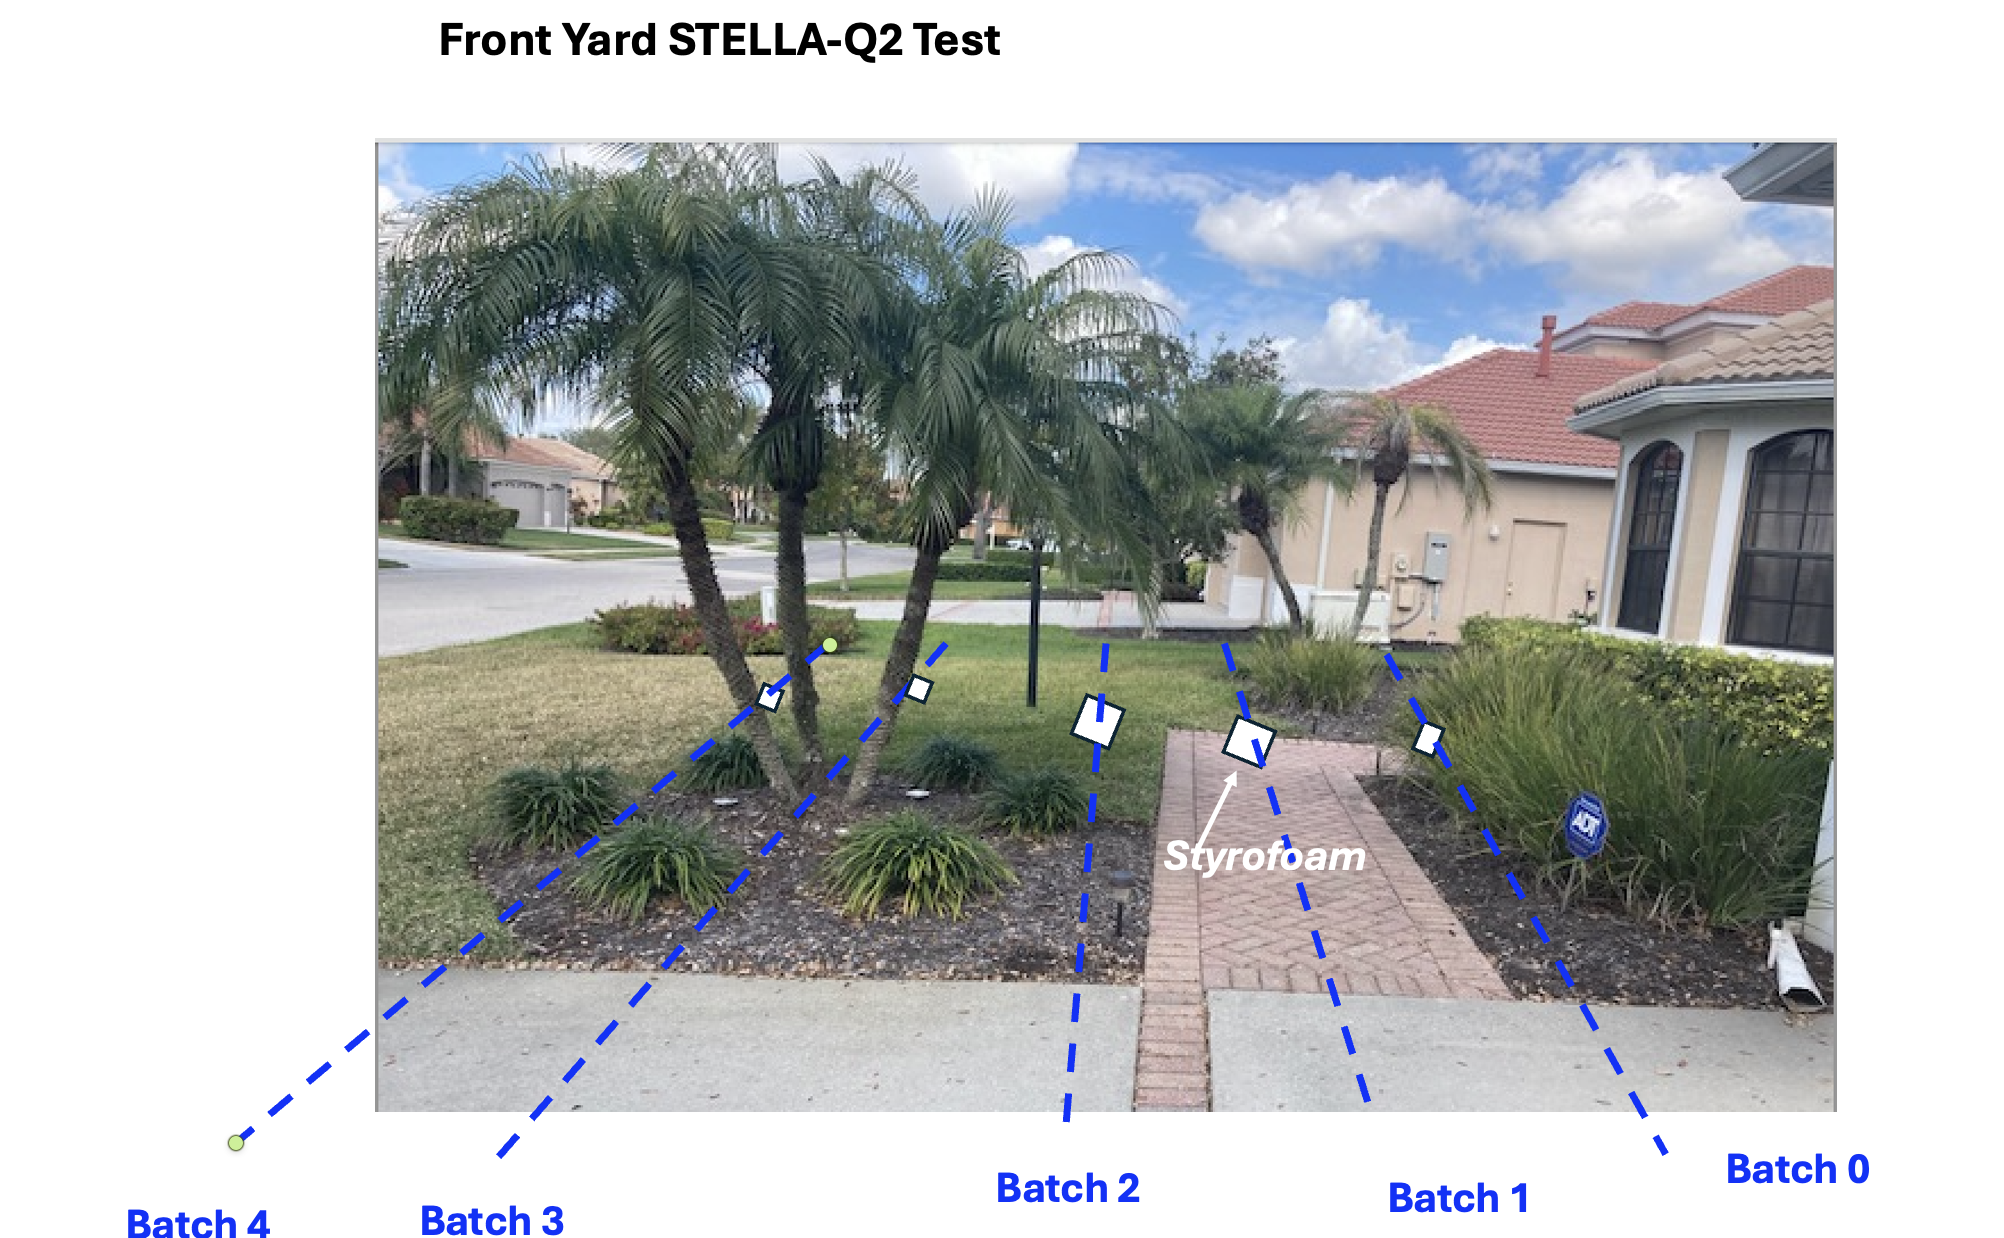

## Read in Excel data file collected on the STELLA-Q2 micro SD card:

In [2]:
#read the file
#file = r'data_test2.xlsx'
#file = r'data_true_colors.xlsx'
#file = r'data_true_colors2.xlsx'
#file = r'data_front_yard_grass_brick.xlsx'
file = r'data-front_yard.xlsx'
df = pd.read_excel(file,index_col=False)
df.head()

device_type  software_version   UID  Number      Test  Reading   batch  \
0   STELLA-Q2             2.4.0  6858       0  Concrete        1       0   
1   STELLA-Q2             2.4.0  6858       1         1        2       0   
2   STELLA-Q2             2.4.0  6858       2         1        3       0   
3   STELLA-Q2             2.4.0  6858       3         1        4       0   
4   STELLA-Q2             2.4.0  6858       4         1        5       0   

   weekday  timestamp_iso8601   decimal_hour  ...  \
0   Monday   20240304T182207Z        18.3686  ...   
1   Monday   20240304T182209Z        18.3692  ...   
2   Monday   20240304T182210Z        18.3694  ...   
3   Monday   20240304T182212Z        18.3700  ...   
4   Monday   20240304T182213Z        18.3703  ...   

    irradiance_900nm_wheat_wavelength_nm  \
0                                    900   
1                                    900   
2                                    900   
3                                    900   
4                                    900   

    irradiance_900nm_wheat_wavelength_uncertainty_nm  \
0                                                 10   
1                                                 10   
2                                                 10   
3                                                 10   
4                                                 10   

    irradiance_900nm_wheat_irradiance_uW_per_cm_squared  \
0                                            398.423      
1                                            405.647      
2                                            408.981      
3                                            381.753      
4                                            361.748      

    irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared  \
0                                             47.811                  
1                                             48.678                  
2                                             49.078                  
3                                             45.810                  
4                                             43.410                  

    irradiance_940nm_gold_wavelength_nm  \
0                                   940   
1                                   940   
2                                   940   
3                                   940   
4                                   940   

    irradiance_940nm_gold_wavelength_uncertainty_nm  \
0                                                10   
1                                                10   
2                                                10   
3                                                10   
4                                                10   

    irradiance_940nm_gold_irradiance_uW_per_cm_squared  \
0                                            234.705     
1                                            237.352     
2                                            240.000     
3                                            225.882     
4                                            208.235     

    irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared  \
0                                             28.165                 
1                                             28.482                 
2                                             28.800                 
3                                             27.106                 
4                                             24.988                 

    battery_voltage   battery_percent  
0              4.15                96  
1              4.15                96  
2              4.14                96  
3              4.14                96  
4              4.15                96  

[5 rows x 86 columns]

## Explore the data:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 86 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   device_type                                                            359 non-null    object 
 1    software_version                                                      359 non-null    object 
 2    UID                                                                   359 non-null    int64  
 3   Number                                                                 359 non-null    int64  
 4   Test                                                                   359 non-null    object 
 5   Reading                                                                359 non-null    int64  
 6    batch                                                                 359 non-null    int

## We did alter the original code.py file on the STELLA-Q2 to use actual color names for the following column data vs. *near IR* as in the original STELLA-Q2 code.py code file.

     49   irradiance_680nm_black_wavelength_nm                                  60 non-null     int64  
     50   irradiance_680nm_black_wavelength_uncertainty_nm                      60 non-null     int64  
     51   irradiance_680nm_black_irradiance_uW_per_cm_squared                   60 non-null     float64
     52   irradiance_680nm_black_irradiance_uncertainty_uW_per_cm_squared       60 non-null     float64
     53   irradiance_705nm_brown_wavelength_nm                                  60 non-null     int64  
     54   irradiance_705nm_brown_wavelength_uncertainty_nm                      60 non-null     int64  
     55   irradiance_705nm_brown_irradiance_uW_per_cm_squared                   60 non-null     float64
     56   irradiance_705nm_brown_irradiance_uncertainty_uW_per_cm_squared       60 non-null     float64
     57   irradiance_730nm_gray_wavelength_nm                                   60 non-null     int64  
     58   irradiance_730nm_gray_wavelength_uncertainty_nm                       60 non-null     int64  
     59   irradiance_730nm_gray_irradiance_uW_per_cm_squared                    60 non-null     float64
     60   irradiance_730nm_gray_irradiance_uncertainty_uW_per_cm_squared        60 non-null     float64
     61   irradiance_760nm_silver_wavelength_nm                                 60 non-null     int64  
     62   irradiance_760nm_silver_wavelength_uncertainty_nm                     60 non-null     int64  
     63   irradiance_760nm_silver_irradiance_uW_per_cm_squared                  60 non-null     float64
     64   irradiance_760nm_silver_irradiance_uncertainty_uW_per_cm_squared      60 non-null     float64
     65   irradiance_810nm_lightgray_wavelength_nm                              60 non-null     int64  
     66   irradiance_810nm_lightgray_wavelength_uncertainty_nm                  60 non-null     int64  
     67   irradiance_810nm_lightgray_irradiance_uW_per_cm_squared               60 non-null     float64
     68   irradiance_810nm_lightgray_irradiance_uncertainty_uW_per_cm_squared   60 non-null     float64
     69   irradiance_860nm_linen_wavelength_nm                                  60 non-null     int64  
     70   irradiance_860nm_linen_wavelength_uncertainty_nm                      60 non-null     int64  
     71   irradiance_860nm_linen_irradiance_uW_per_cm_squared                   60 non-null     float64
     72   irradiance_860nm_linen_irradiance_uncertainty_uW_per_cm_squared       60 non-null     float64
     73   irradiance_900nm_wheat_wavelength_nm                                  60 non-null     int64  
     74   irradiance_900nm_wheat_wavelength_uncertainty_nm                      60 non-null     int64  
     75   irradiance_900nm_wheat_irradiance_uW_per_cm_squared                   60 non-null     float64
     76   irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared       60 non-null     float64
     77   irradiance_940nm_gold_wavelength_nm                                   60 non-null     int64  
     78   irradiance_940nm_gold_wavelength_uncertainty_nm                       60 non-null     int64  
     79   irradiance_940nm_gold_irradiance_uW_per_cm_squared                    60 non-null     float64
     80   irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared        60 non-null     float64


In [4]:
df.describe()

UID      Number     Reading       batch   decimal_hour  \
count   359.000000  359.000000  359.000000  359.000000      359.00000   
mean   6858.434540  172.782730   36.401114    2.002786       18.46823   
std       1.960655   96.399411   20.755711    1.417170        0.05865   
min    6858.000000    0.000000    1.000000    0.000000       18.36860   
25%    6858.000000   89.500000   18.500000    1.000000       18.42080   
50%    6858.000000  179.000000   36.000000    2.000000       18.47000   
75%    6858.000000  260.500000   54.000000    3.000000       18.51905   
max    6873.000000  335.000000   72.000000    4.000000       18.56330   

        bandwidth_FWHM_nm   field_of_view_FWHM_DEG  \
count               359.0                    359.0   
mean                 20.0                     20.0   
std                   0.0                      0.0   
min                  20.0                     20.0   
25%                  20.0                     20.0   
50%                  20.0                     20.0   
75%                  20.0                     20.0   
max                  20.0                     20.0   

        irradiance_410nm_purple_wavelength_nm  \
count                                   359.0   
mean                                    410.0   
std                                       0.0   
min                                     410.0   
25%                                     410.0   
50%                                     410.0   
75%                                     410.0   
max                                     410.0   

        irradiance_410nm_purple_wavelength_uncertainty_nm  \
count                                              359.0    
mean                                                10.0    
std                                                  0.0    
min                                                 10.0    
25%                                                 10.0    
50%                                                 10.0    
75%                                                 10.0    
max                                                 10.0    

        irradiance_410nm_purple_irradiance_uW_per_cm_squared  ...  \
count                                         359.000000      ...   
mean                                         1851.860655      ...   
std                                          1827.192741      ...   
min                                           329.293000      ...   
25%                                          1087.005000      ...   
50%                                          1615.830000      ...   
75%                                          1897.480000      ...   
max                                         16216.200000      ...   

        irradiance_900nm_wheat_wavelength_nm  \
count                                  359.0   
mean                                   900.0   
std                                      0.0   
min                                    900.0   
25%                                    900.0   
50%                                    900.0   
75%                                    900.0   
max                                    900.0   

        irradiance_900nm_wheat_wavelength_uncertainty_nm  \
count                                              359.0   
mean                                                10.0   
std                                                  0.0   
min                                                 10.0   
25%                                                 10.0   
50%                                                 10.0   
75%                                                 10.0   
max                                                 10.0   

        irradiance_900nm_wheat_irradiance_uW_per_cm_squared  \
count                                         359.000000      
mean                                         1701.330794      
std                                           732.310551      
min                           

In [5]:
df.head()

device_type  software_version   UID  Number      Test  Reading   batch  \
0   STELLA-Q2             2.4.0  6858       0  Concrete        1       0   
1   STELLA-Q2             2.4.0  6858       1         1        2       0   
2   STELLA-Q2             2.4.0  6858       2         1        3       0   
3   STELLA-Q2             2.4.0  6858       3         1        4       0   
4   STELLA-Q2             2.4.0  6858       4         1        5       0   

   weekday  timestamp_iso8601   decimal_hour  ...  \
0   Monday   20240304T182207Z        18.3686  ...   
1   Monday   20240304T182209Z        18.3692  ...   
2   Monday   20240304T182210Z        18.3694  ...   
3   Monday   20240304T182212Z        18.3700  ...   
4   Monday   20240304T182213Z        18.3703  ...   

    irradiance_900nm_wheat_wavelength_nm  \
0                                    900   
1                                    900   
2                                    900   
3                                    900   
4                                    900   

    irradiance_900nm_wheat_wavelength_uncertainty_nm  \
0                                                 10   
1                                                 10   
2                                                 10   
3                                                 10   
4                                                 10   

    irradiance_900nm_wheat_irradiance_uW_per_cm_squared  \
0                                            398.423      
1                                            405.647      
2                                            408.981      
3                                            381.753      
4                                            361.748      

    irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared  \
0                                             47.811                  
1                                             48.678                  
2                                             49.078                  
3                                             45.810                  
4                                             43.410                  

    irradiance_940nm_gold_wavelength_nm  \
0                                   940   
1                                   940   
2                                   940   
3                                   940   
4                                   940   

    irradiance_940nm_gold_wavelength_uncertainty_nm  \
0                                                10   
1                                                10   
2                                                10   
3                                                10   
4                                                10   

    irradiance_940nm_gold_irradiance_uW_per_cm_squared  \
0                                            234.705     
1                                            237.352     
2                                            240.000     
3                                            225.882     
4                                            208.235     

    irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared  \
0                                             28.165                 
1                                             28.482                 
2                                             28.800                 
3                                             27.106                 
4                                             24.988                 

    battery_voltage   battery_percent  
0              4.15                96  
1              4.15                96  
2              4.14                96  
3              4.14                96  
4              4.15                96  

[5 rows x 86 columns]

In [6]:
# Remove leading/trailing whitespaces in column names
df.columns = df.columns.str.strip()

## Plot Battery Voltage Level:

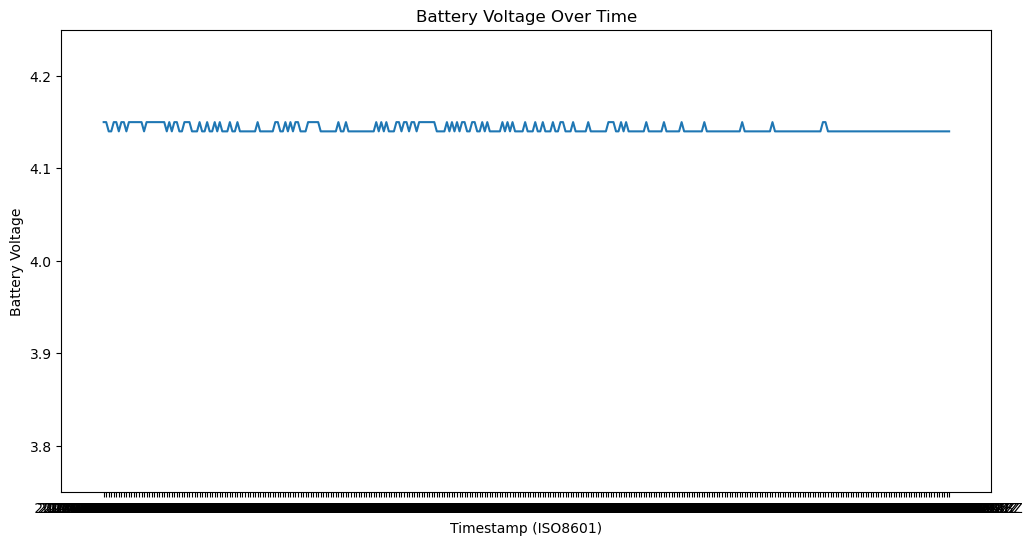

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp_iso8601'], df['battery_voltage'])
plt.ylim(3.75,4.25)
plt.xlabel('Timestamp (ISO8601)')
plt.ylabel('Battery Voltage')
plt.title('Battery Voltage Over Time')
plt.show()


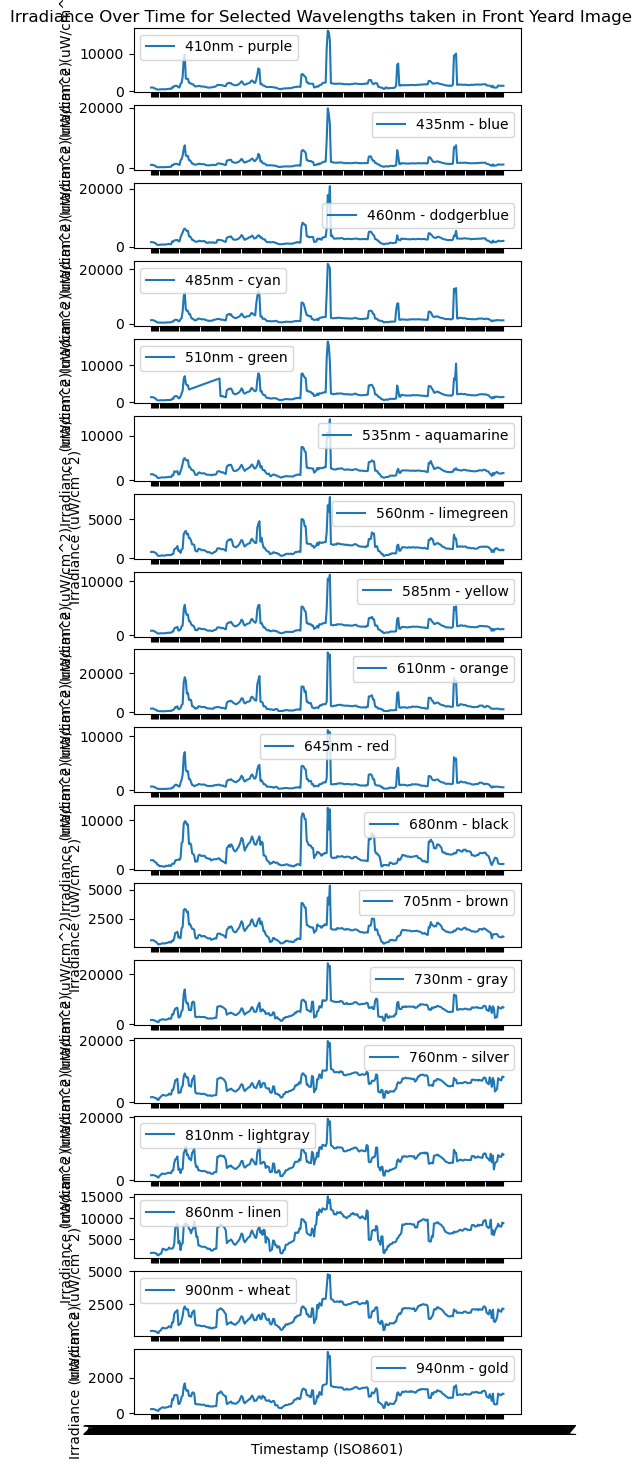

In [8]:
# List of wavelengths for plotting
#wavelengths_to_plot = [410, 435, 450, 485, 510, 535, 560, 585, 610, 645, 680]
wavelengths_to_plot= [410, 435, 460, 485, 510, 535, 560, 585, 610, 645, 680, 705, 730, 760, 810, 860, 900, 940]

# Create subplots
fig, axs = plt.subplots(len(wavelengths_to_plot), 1, figsize=(5, 1 * len(wavelengths_to_plot)), sharex=True)

# Loop through each wavelength and plot the data
for i, wavelength in enumerate(wavelengths_to_plot):
    # Use regex to match column names containing the wavelength
    wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
    wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]
    
    # Plot the data for each matched column
    for column in wavelength_columns:
        color = re.search(wavelength_pattern, column).group(1)
        axs[i].plot(df['timestamp_iso8601'], df[column], label=f'{wavelength}nm - {color}')

    axs[i].set_ylabel('Irradiance (uW/cm^2)')
    axs[i].legend()

# Set common xlabel and title
plt.xlabel('Timestamp (ISO8601)')
plt.suptitle('Irradiance Over Time for Selected Wavelengths taken in Front Yeard Image', y=0.89)

# Show the plot
plt.show()


## The 

In [9]:
from ipywidgets import interact, FloatRangeSlider, Layout


# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(df.columns))))

Test = df['Test']

#def update_plot(timestamp_index, batch_index):
def update_plot(timestamp_index):
    
    #print(timestamp_index)
    
    plt.figure(figsize=(12, 6))

    #timestamp = df3['timestamp_iso8601'][timestamp_index]
    timestamp = timestamp_index
    #test = df3['Test'][Test]
    test = df['Test'][timestamp_index]

    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

            # Define specific colors for certain wavelengths
            if wavelength == '410':
                color = 'purple'
            elif wavelength == '435':
                color = 'blue'
            elif wavelength == '460':
                color = 'dodgerblue'
            elif wavelength == '485':
                color = 'cyan'
            elif wavelength == '510':
                color = 'green'
            elif wavelength == '535':
                color = 'aqumarine'
            elif wavelength == '560':
                color = 'limegreen'
            elif wavelength == '585':
                color = 'yellow'
            elif wavelength == '610':
                color = 'orange'
            elif wavelength == '645':
                color = 'red'
            elif wavelength == '680':
                color = 'black'
            elif wavelength == '705':
                color = 'brown'
            elif wavelength == '730':
                color = 'gray'
            elif wavelength == '760':
                color = 'silver'
            elif wavelength == '810':
                color = 'lightgray'
            elif wavelength == '860':
                color = 'linen'
            elif wavelength == '900':
                color = 'wheat'
            elif wavelength == '940':
                color = 'gold'

            # Map custom colors to standard recognized color names
            # color = map_color(color)

            # Check if the column exists before using it
            if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in df.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in df.columns:
                wavelength_data = df[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][timestamp_index]
                irradiance_data = df[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][timestamp_index]
                wavelength_uncertainty = df[f'irradiance_{wavelength}nm_{color}_wavelength_uncertainty_nm'][timestamp_index]
                irradiance_uncertainty = df[f'irradiance_{wavelength}nm_{color}_irradiance_uncertainty_uW_per_cm_squared'][timestamp_index]

                # Create a Gaussian distribution
                x_values = np.linspace(wavelength_data - 3 * wavelength_uncertainty,
                                       wavelength_data + 3 * wavelength_uncertainty, 100)
                y_values = irradiance_data * np.exp(-0.5 * ((x_values - wavelength_data) / wavelength_uncertainty) ** 2)

                # Plot Gaussian distribution
                plt.plot(x_values, y_values, label=f'{wavelength}nm - {color}', linestyle='--', linewidth=2, color=color)

                # Plot data point with error bars
                plt.errorbar(wavelength_data, irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty,
                             linestyle='', marker='o', markersize=5, capsize=5, color=color)

                  
   # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum',label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet',label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue',label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green',label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow',label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange',label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red',label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')


    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.xlim(350,1000)
    plt.ylim(0,20000)    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid()
    #plt.title(f"Irradiance Over Wavelength by Timestamp {timestamp} and Batch {batch_index}: \n Test Pattern {df3['Test']}")
    #plt.title(f"Irradiance Over Wavelength for Backyard Readings {timestamp}: \n \n Test Pattern {df3['Test']}")
    plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {df['Test']}")

    
    
#timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(df3) - 1, step=1, description='Timestamp Index')
timestamp_slider = widgets.IntSlider(value=0 , min=0, max=len(df)-1 , step=1, description='Pattern#', continuous_update=True, orientation='horizontal', layout=Layout(width='90%'))#,
    #readout=True)
    #readout_format='d')

batch_slider = widgets.IntSlider(value=0, min=0, max=20, step=1, description='Batch Index')

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider, batch_index=batch_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Pattern#', layout=Layout(width='90%'), max=358), Output(…

In [10]:
from ipywidgets import interact, FloatRangeSlider, Layout

def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = timestamp_index
    test = df['Test'][timestamp_index]

    wavelength_data_list = []
    irradiance_data_list = []
    
    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

            # Check if the column exists before using it
            if column in df.columns:
                # Extract wavelength data
                wavelength_data_str = wavelength
                try:
                    wavelength_data = int(wavelength_data_str)  # Convert string to integer
                except ValueError:
                    try:
                        wavelength_data = float(wavelength_data_str)  # Convert string to float
                    except ValueError:
                        continue  # Skip if wavelength cannot be converted to int or float

                # Append data to lists
                wavelength_data_list.append(wavelength_data)
                irradiance_data_list.append(df[column][timestamp_index])
                
    # Plot data points
    plt.plot(wavelength_data_list, irradiance_data_list, linestyle='-', marker = 'o',markersize = 10, markeredgecolor = 'black', mfc = 'k', linewidth = 4,color='red')

   # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum',label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet',label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue',label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green',label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow',label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange',label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red',label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')
            
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(350,1000)
    plt.ylim(0,20000)    
    plt.grid()
    #plt.title(f"Raw Readings Irradiance Over Wavelength by Test Pattern {timestamp}: \n \n Test Pattern {df['Test']}")
    plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {df['Test']}")

# Create a slider widget
timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(df) - 1, step=1, description='Timestamp Index', layout=Layout(width='90%'))  # Adjust width of the slider)

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', layout=Layout(width='90%'), max=358), …

In [11]:
def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = timestamp_index
    test = df['Test'][timestamp_index]

    wavelength_data_list = []
    irradiance_data_list = []
    
    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

            # Check if the column exists before using it
            if column in df.columns:
                # Extract wavelength data
                wavelength_data_str = wavelength
                try:
                    wavelength_data = int(wavelength_data_str)  # Convert string to integer
                except ValueError:
                    try:
                        wavelength_data = float(wavelength_data_str)  # Convert string to float
                    except ValueError:
                        continue  # Skip if wavelength cannot be converted to int or float

                # Append data to lists
                wavelength_data_list.append(wavelength_data)
                irradiance_data_list.append(df[column][timestamp_index])
                
    # Plot data points
    plt.plot(wavelength_data_list, irradiance_data_list, linestyle='-', marker='o', markersize=5, markeredgecolor='blue', mfc='k', linewidth=3, color='red')

    # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum', label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet', label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue', label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green', label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow', label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange', label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red', label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender', label='Near IR from 700-1,000nm')
    
    # Fill between the line and y=0
    plt.fill_between(wavelength_data_list, 0, irradiance_data_list, color='yellow', alpha=0.2)
            
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(410,940)
    plt.ylim(0,20000)    
    plt.grid()
    plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {df['Test']}")

# Create a slider widget
timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(df) - 1, step=1, description='Timestamp Index', layout=Layout(width='90%'))
# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', layout=Layout(width='90%'), max=358), …

## Plot bewtween a Sample Range:

In [12]:
def update_plot(timestamp_range):
    plt.figure(figsize=(12, 6))

    start_timestamp_index, end_timestamp_index = timestamp_range
    test = df['Test'][start_timestamp_index]

    # Loop over the range of timestamp indices
    for timestamp_index in range(start_timestamp_index, end_timestamp_index + 1):
        wavelength_data_list = []
        irradiance_data_list = []

        for wavelength in wavelengths:
            wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
            wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]

            for column in wavelength_columns:
                color = 'black'  # Default color for wavelengths not explicitly defined

                # Check if the column exists before using it
                if column in df.columns:
                    # Extract wavelength data
                    wavelength_data_str = wavelength
                    try:
                        wavelength_data = int(wavelength_data_str)  # Convert string to integer
                    except ValueError:
                        try:
                            wavelength_data = float(wavelength_data_str)  # Convert string to float
                        except ValueError:
                            continue  # Skip if wavelength cannot be converted to int or float

                    # Append data to lists
                    wavelength_data_list.append(wavelength_data)
                    irradiance_data_list.append(df[column][timestamp_index])

        # Plot data points
        plt.plot(wavelength_data_list, irradiance_data_list, linestyle='-', marker='o', markersize=5, markeredgecolor='blue', mfc='k', linewidth=3, color='red')

    # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum', label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet', label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue', label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green', label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow', label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange', label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red', label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender', label='Near IR from 700-1,000nm')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(350,1000)
    #plt.ylim(0,14000)
    plt.grid()
    plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {df['Test']}")

# Create a range slider widget for timestamp indices
timestamp_range_slider = widgets.IntRangeSlider(value=(0, len(df) - 1), min=0, max=len(df) - 1, step=1, description='Timestamp Range')

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_range=timestamp_range_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntRangeSlider(value=(0, 358), description='Timestamp Range', max=358), Output()), _dom_…

## All Backyard Grass and Shoreline samples:

Timestamp not implemented yet.

In [13]:
# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(df.columns))))

# Function to update the plot based on selected timestamp
def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = df['timestamp_iso8601'][timestamp_index]

    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = re.search(wavelength_pattern, column).group(1)

            wavelength_data = df[f'irradiance_{wavelength}nm_{color}_wavelength_nm']
            irradiance_data = df[column]
            wavelength_uncertainty = df[f'irradiance_{wavelength}nm_{color}_wavelength_uncertainty_nm']
            irradiance_uncertainty = df[f'irradiance_{wavelength}nm_{color}_irradiance_uncertainty_uW_per_cm_squared']

            plt.errorbar(wavelength_data, irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty,color=color,
                         label=f'{wavelength}nm - {color}', linestyle='', marker='o', markersize=3, capsize=3)

   # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum',label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet',label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue',label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green',label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow',label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange',label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red',label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')
           
            
            
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(350,1000)
    #plt.ylim(0,14000)    
 
    plt.grid()
    #plt.title(f'Irradiance Over Wavelength - {timestamp}')
    plt.title(f"Raw Readings Irradiance Over Wavelength for all Backyard Readings {timestamp_index}: \n \n Test Pattern {df['Test']}")


# Create a slider widget
timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(df) - 1, step=1, description='Timestamp Index',disabled=True,)

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', disabled=True, max=358), Output()), _d…

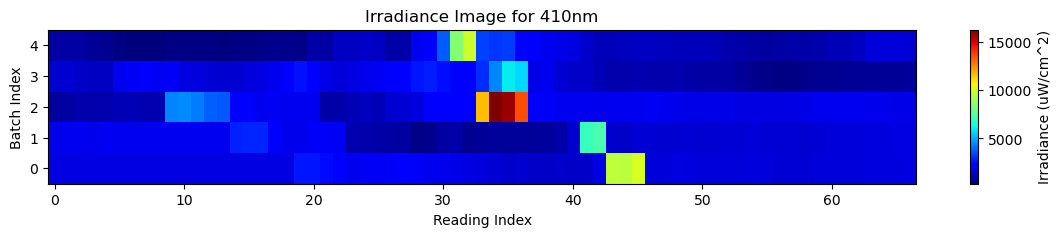

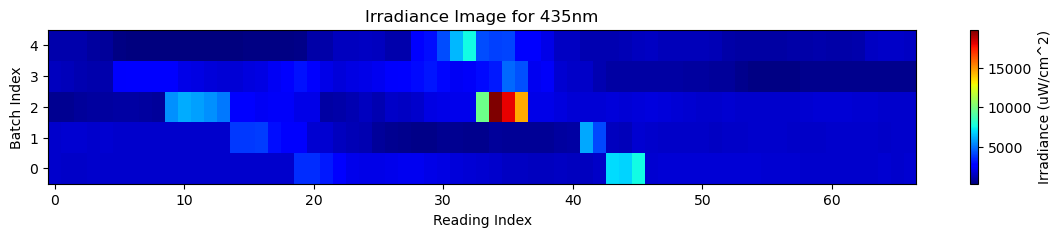

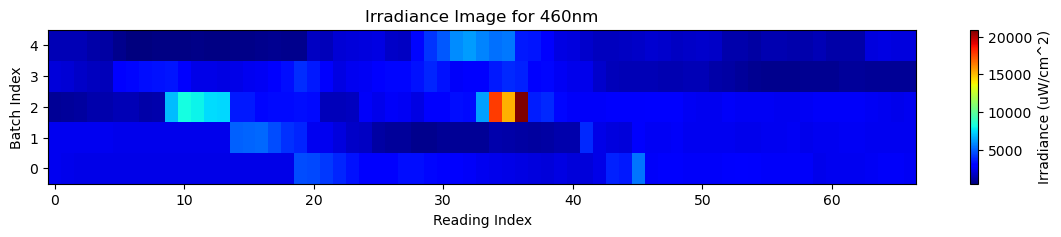

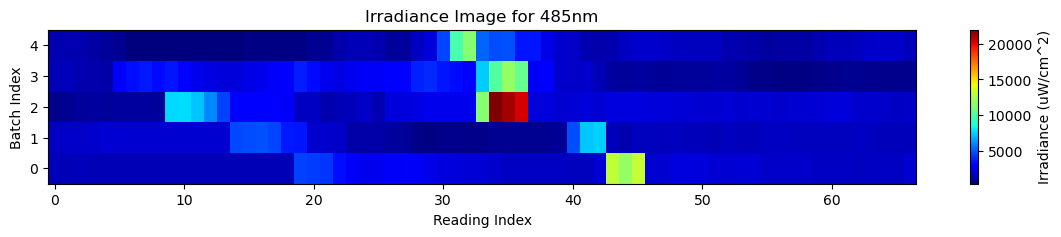

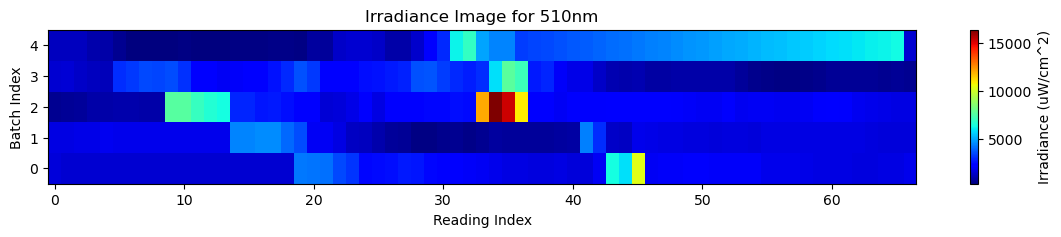

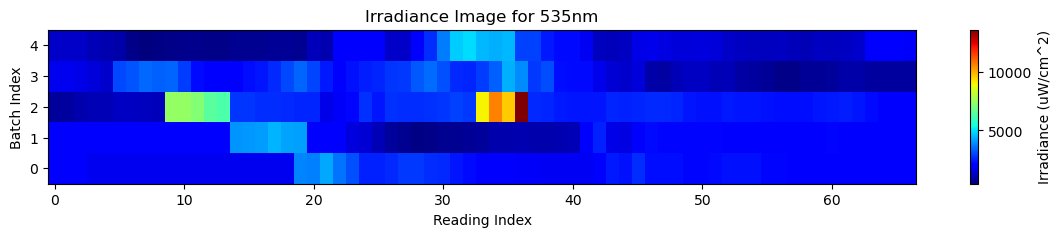

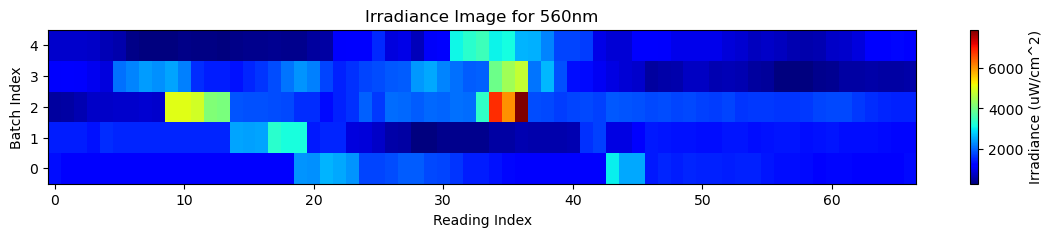

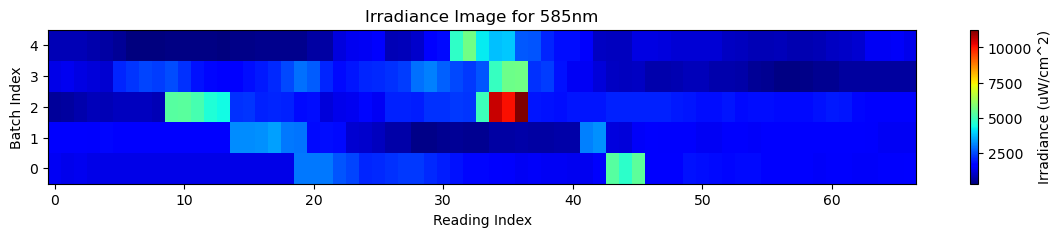

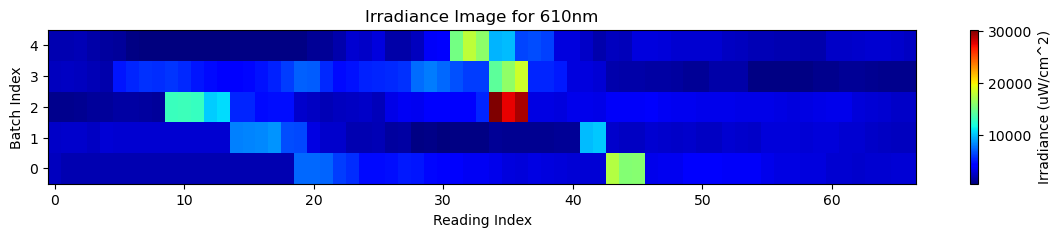

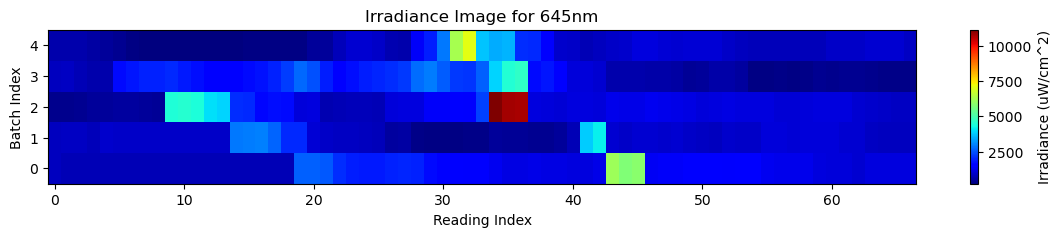

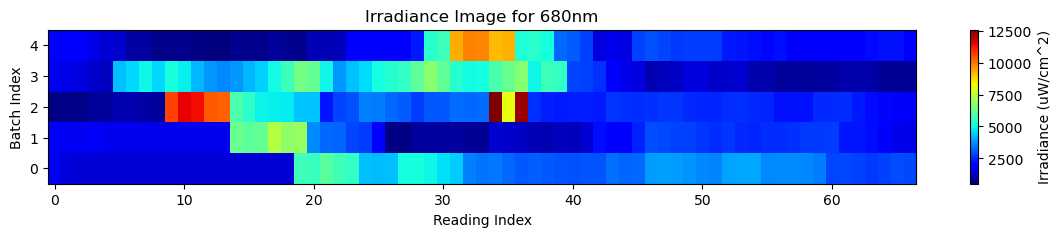

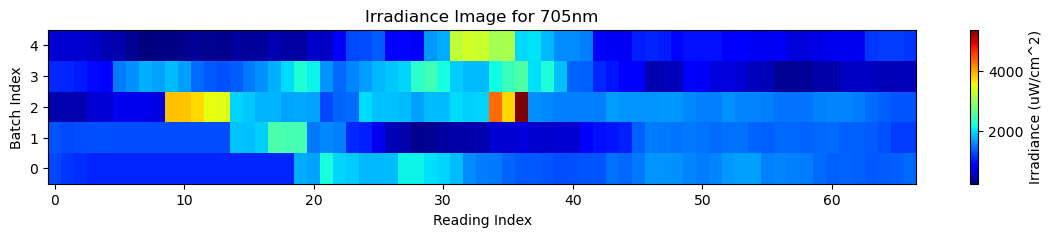

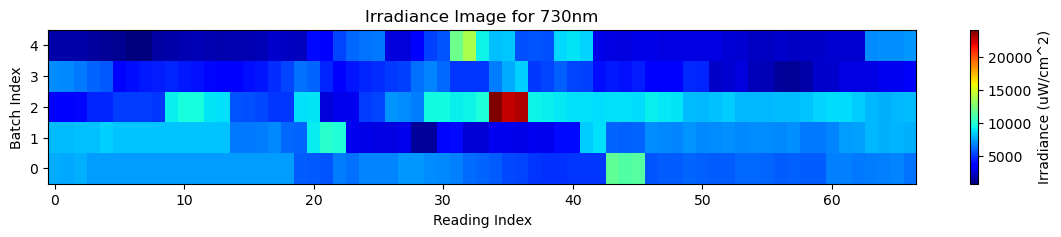

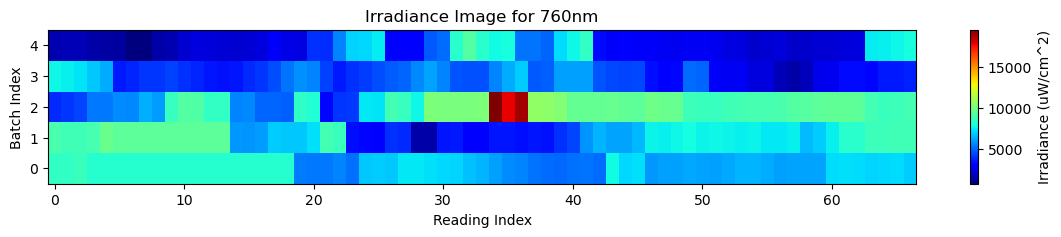

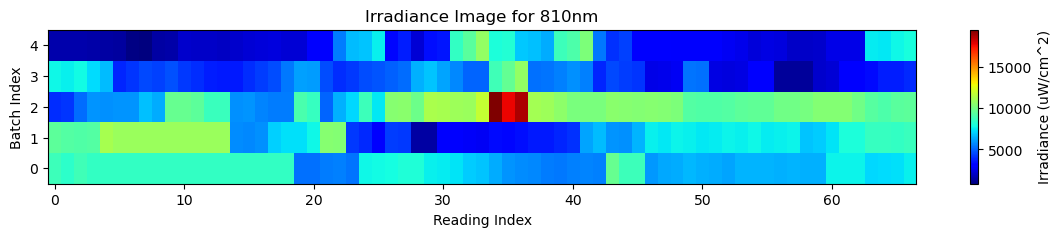

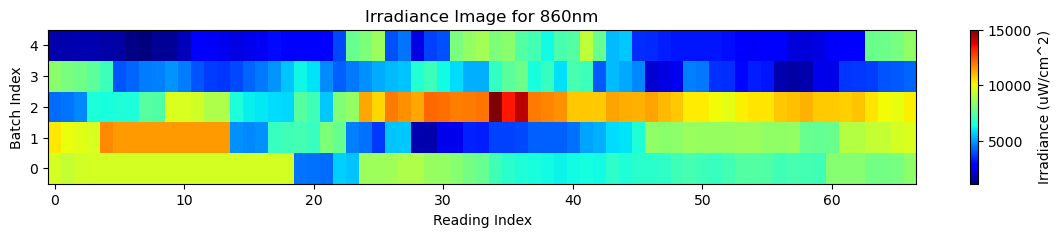

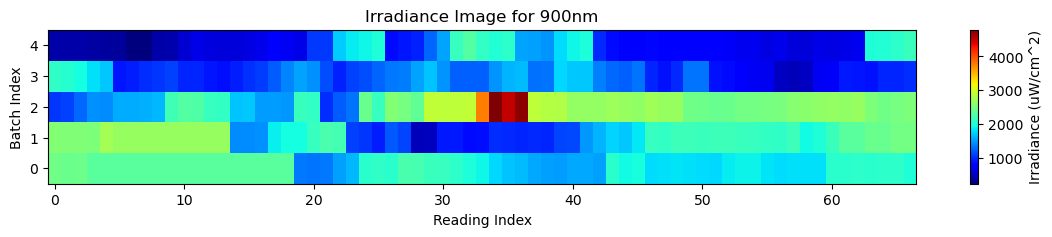

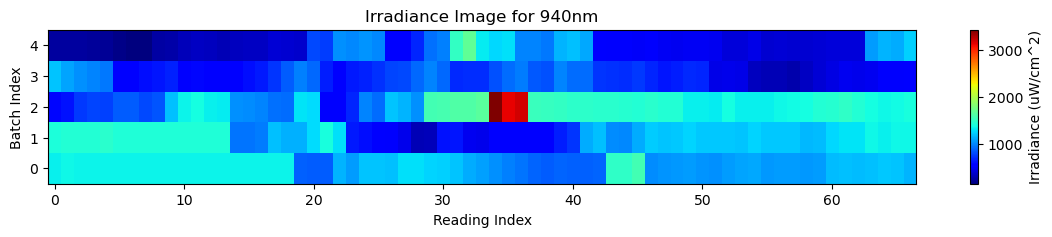

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Function to create image for a specific wavelength
def create_image_for_wavelength(wavelength):
    # Select columns relevant to the specific wavelength
    wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
    wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]

    # Create an empty array to store the irradiance values
    image_data = []

    # Populate the array with irradiance values for each batch
    for i in range(5):  # Assuming there are 5 batches
        batch_data = []
        for col in wavelength_columns:
            batch_data.extend(df[col][i * 67:(i + 1) * 67])  # Assuming each batch has 67 readings
        image_data.append(batch_data)

    # Reverse the order of image_data to have Batch Index 1 at the bottom
    image_data.reverse()

    # Create the image
    plt.figure(figsize=(14, 2))
    plt.imshow(image_data, aspect='auto', cmap='jet')  # You can change the colormap as desired
    plt.colorbar(label='Irradiance (uW/cm^2)')
    plt.xlabel('Reading Index')
    plt.ylabel('Batch Index')
    plt.title(f'Irradiance Image for {wavelength}nm')
    plt.gca().invert_yaxis()  # Invert y-axis to have Batch Index 1 at the bottom
    plt.show()

# Create images for each wavelength
for wavelength in wavelengths:
    create_image_for_wavelength(wavelength)


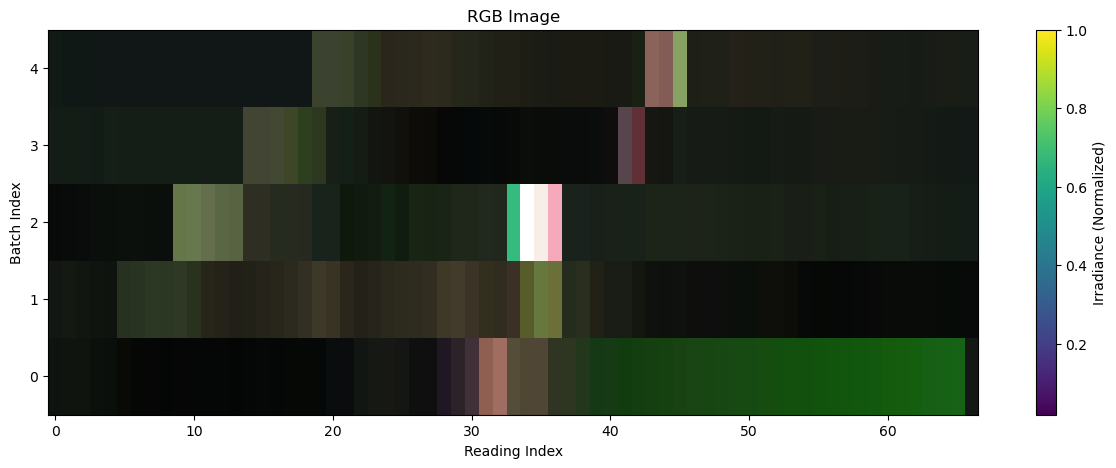

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Function to create RGB image
def create_rgb_image():
    # Select columns relevant to the Red, Green, and Blue spectra
    red_columns = [col for col in df.columns if '645nm_red_irradiance_uW_per_cm_squared' in col]
    green_columns = [col for col in df.columns if '510nm_green_irradiance_uW_per_cm_squared' in col]
    blue_columns = [col for col in df.columns if '435nm_blue_irradiance_uW_per_cm_squared' in col]

    # Create empty arrays to store the irradiance values for each channel
    red_data = np.array([])
    green_data = np.array([])
    blue_data = np.array([])

    # Populate the arrays with irradiance values for each batch
    for i in range(5):  # Assuming there are 5 batches
        for col in red_columns:
            red_data = np.append(red_data, df[col][i * 67:(i + 1) * 67])  # Assuming each batch has 67 readings
        for col in green_columns:
            green_data = np.append(green_data, df[col][i * 67:(i + 1) * 67])  # Assuming each batch has 67 readings
        for col in blue_columns:
            blue_data = np.append(blue_data, df[col][i * 67:(i + 1) * 67])  # Assuming each batch has 67 readings

    # Reshape the data arrays to match the image dimensions
    red_data = red_data.reshape(5, -1)  # Assuming 5 batches
    green_data = green_data.reshape(5, -1)  # Assuming 5 batches
    blue_data = blue_data.reshape(5, -1)  # Assuming 5 batches

    # Normalize the data to [0, 1]
    red_data /= red_data.max()
    green_data /= green_data.max()
    blue_data /= blue_data.max()

    # Create the RGB image
    rgb_image = np.stack((red_data, green_data, blue_data), axis=-1)

    # Plot the RGB image
    plt.figure(figsize=(15, 5))
    plt.imshow(rgb_image, aspect='auto')  # Adjust aspect ratio
    plt.xlabel('Reading Index')
    plt.ylabel('Batch Index')
    plt.title('RGB Image')
    plt.colorbar(label='Irradiance (Normalized)')
    plt.gca().invert_yaxis()  # Invert y-axis to have Batch Index 1 at the bottom
    plt.show()

# Create the RGB image
create_rgb_image()


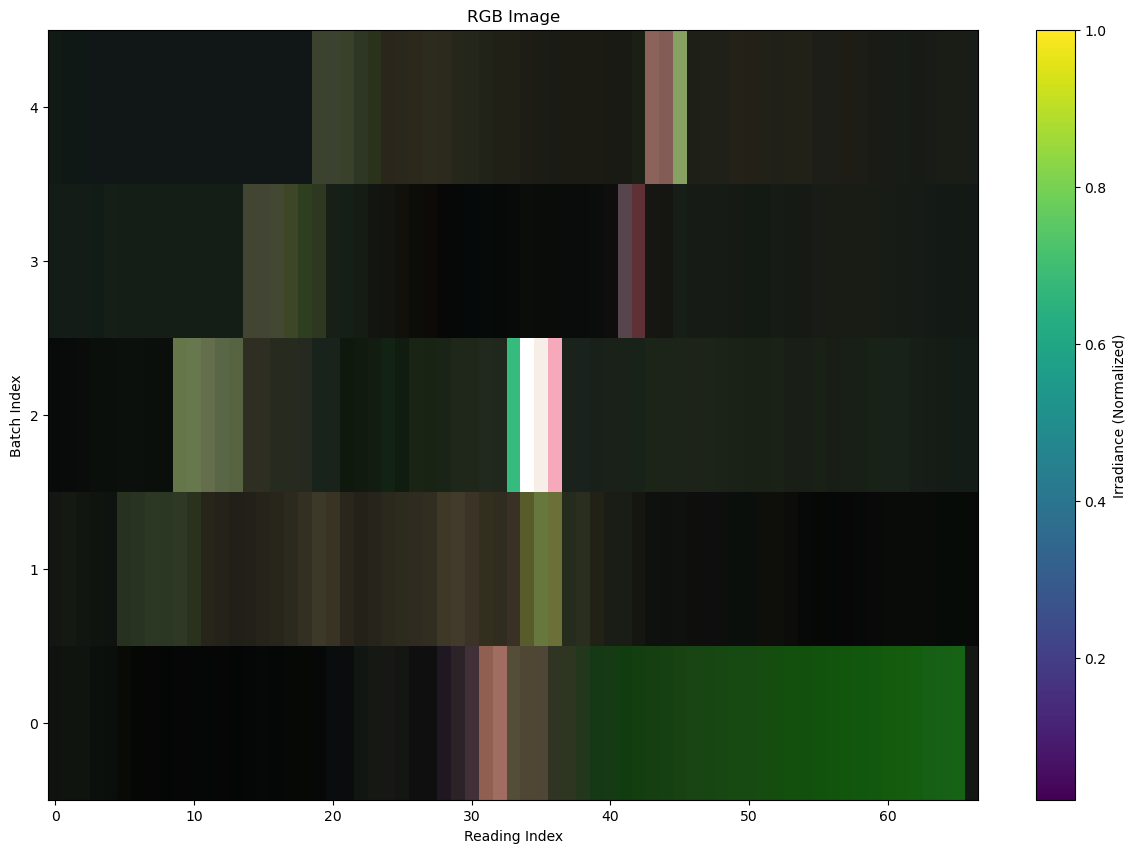

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Function to create RGB image
def create_rgb_image():
    # Select columns relevant to the Red, Green, and Blue spectra
    red_columns = [col for col in df.columns if '645nm_red_irradiance_uW_per_cm_squared' in col]
    green_columns = [col for col in df.columns if '510nm_green_irradiance_uW_per_cm_squared' in col]
    blue_columns = [col for col in df.columns if '435nm_blue_irradiance_uW_per_cm_squared' in col]

    # Create empty arrays to store the irradiance values for each channel
    red_data = np.array([])
    green_data = np.array([])
    blue_data = np.array([])

    # Populate the arrays with irradiance values for each batch
    for i in range(5):  # Assuming there are 5 batches
        for col in red_columns:
            red_data = np.append(red_data, df[col][i * 67:(i + 1) * 67])  # Assuming each batch has 67 readings
        for col in green_columns:
            green_data = np.append(green_data, df[col][i * 67:(i + 1) * 67])  # Assuming each batch has 67 readings
        for col in blue_columns:
            blue_data = np.append(blue_data, df[col][i * 67:(i + 1) * 67])  # Assuming each batch has 67 readings

    # Reshape the data arrays to match the image dimensions
    red_data = red_data.reshape(5, -1)  # Assuming 5 batches
    green_data = green_data.reshape(5, -1)  # Assuming 5 batches
    blue_data = blue_data.reshape(5, -1)  # Assuming 5 batches

    # Normalize the data to [0, 1]
    red_data /= red_data.max()
    green_data /= green_data.max()
    blue_data /= blue_data.max()

    # Create the RGB image
    rgb_image = np.stack((red_data, green_data, blue_data), axis=-1)

    # Plot the RGB image
    plt.figure(figsize=(15, 10))
    plt.imshow(rgb_image, aspect='auto', cmap='viridis')  # Use viridis colormap
    plt.xlabel('Reading Index')
    plt.ylabel('Batch Index')
    plt.title('RGB Image')
    plt.colorbar(label='Irradiance (Normalized)')
    plt.gca().invert_yaxis()  # Invert y-axis to have Batch Index 1 at the bottom
    plt.show()

# Create the RGB image
create_rgb_image()


# Now polulate each row by the proper number of readings:

        num_readings = {
            0: 72,
            1: 71,
            2: 64,
            3: 57,
            4: 72
        }[i]


[[1280.87       1282.92       1287.71       1076.29        979.126
   654.803       453.641       403.693       434.483       444.746
   472.115       461.168       443.378       419.43        500.853
   514.537       502.221       556.959       529.59        522.748
   882.65        800.543      1455.35       1538.82       1572.35
  1449.19        996.231      1022.92       1476.56       2244.26
  3076.28       6192.92       6959.25       4948.31       4506.3
  4506.3        3356.01288235 3459.37357423 3562.73426611 3666.09495798
  3769.45564986 3872.81634174 3976.17703361 4079.53772549 4182.89841737
  4286.25910924 4389.61980112 4492.980493   4596.34118487 4699.70187675
  4803.06256863 4906.4232605  5009.78395238 5113.14464426 5216.50533613
  5319.86602801 5423.22671989 5526.58741176 5629.94810364 5733.30879552
  5836.66948739 5940.03017927 6043.39087115 6146.75156303 6250.1122549
  6353.47294678 1556.61       1536.08       1606.56       1430.03
  1319.87       1229.55      ]
 [   0.

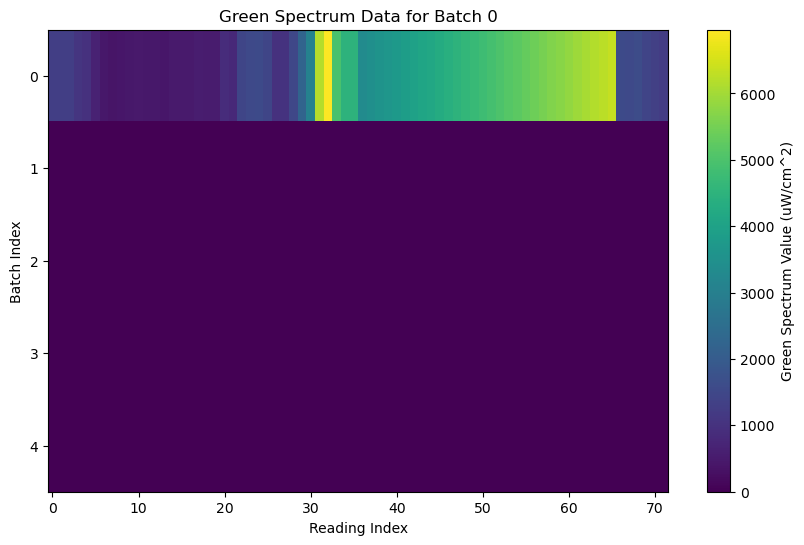

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the green spectrum data for batch 0
green_column = 'irradiance_510nm_green_irradiance_uW_per_cm_squared'
green_data = df[df['batch'] == 0][green_column].values

# Get the number of readings for batch 0
num_readings_batch_0 = len(green_data)

# Initialize an empty matrix to store the green spectrum data
green_matrix_batch_0 = np.zeros((5, num_readings_batch_0))

# Store the green spectrum data in the matrix
green_matrix_batch_0[0, :] = green_data

print(green_matrix_batch_0)       



# Visualize the green spectrum data for batch 0
plt.figure(figsize=(10, 6))
plt.imshow(green_matrix_batch_0, aspect='auto', cmap='viridis')
plt.xlabel('Reading Index')
plt.ylabel('Batch Index')
plt.title('Green Spectrum Data for Batch 0')
plt.colorbar(label='Green Spectrum Value (uW/cm^2)')
plt.show()


In [18]:
# Iterate over each batch
for batch_index in range(5):
    # Extract the green spectrum data for the current batch
    green_column = f'irradiance_510nm_green_irradiance_uW_per_cm_squared'
    green_data = df[df['batch'] == batch_index][green_column].values
    
    # Print the green data for the current batch
    print(f'Batch {batch_index} Green Data:')
    print(green_data)


Batch 0 Green Data:
[1280.87       1282.92       1287.71       1076.29        979.126
  654.803       453.641       403.693       434.483       444.746
  472.115       461.168       443.378       419.43        500.853
  514.537       502.221       556.959       529.59        522.748
  882.65        800.543      1455.35       1538.82       1572.35
 1449.19        996.231      1022.92       1476.56       2244.26
 3076.28       6192.92       6959.25       4948.31       4506.3
 4506.3        3356.01288235 3459.37357423 3562.73426611 3666.09495798
 3769.45564986 3872.81634174 3976.17703361 4079.53772549 4182.89841737
 4286.25910924 4389.61980112 4492.980493   4596.34118487 4699.70187675
 4803.06256863 4906.4232605  5009.78395238 5113.14464426 5216.50533613
 5319.86602801 5423.22671989 5526.58741176 5629.94810364 5733.30879552
 5836.66948739 5940.03017927 6043.39087115 6146.75156303 6250.1122549
 6353.47294678 1556.61       1536.08       1606.56       1430.03
 1319.87       1229.55      ]
Ba

# Plots are upside down:

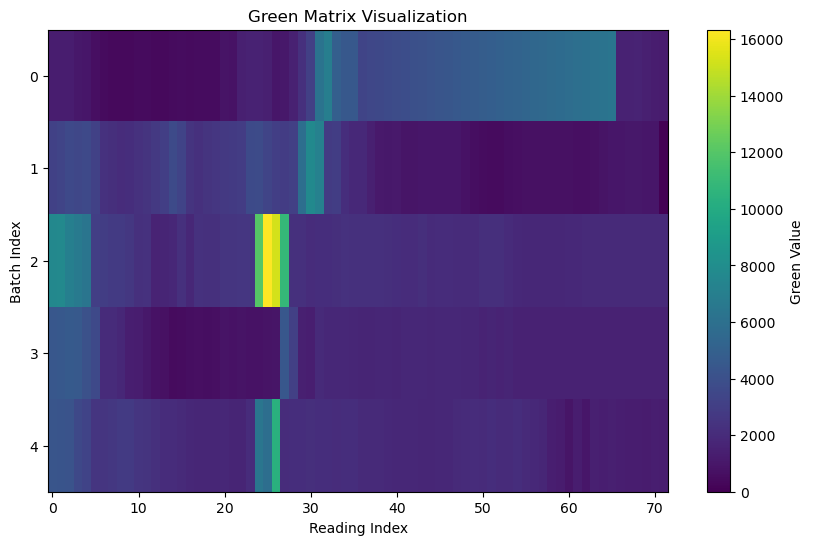

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize an empty matrix to store the green values for each batch
green_matrix = np.zeros((5, 72), dtype=float)

# Iterate over each batch
for batch_index in range(5):
    # Extract the green spectrum data for the current batch
    green_column = 'irradiance_510nm_green_irradiance_uW_per_cm_squared'
    green_data = df[df['batch'] == batch_index][green_column].values
    
    # Populate the green matrix for the current batch
    green_matrix[batch_index, :len(green_data)] = green_data

# Visualize the green matrix
plt.figure(figsize=(10, 6))
plt.imshow(green_matrix, aspect='auto')
plt.xlabel('Reading Index')
plt.ylabel('Batch Index')
plt.title('Green Matrix Visualization')
plt.colorbar(label='Green Value')
plt.show()


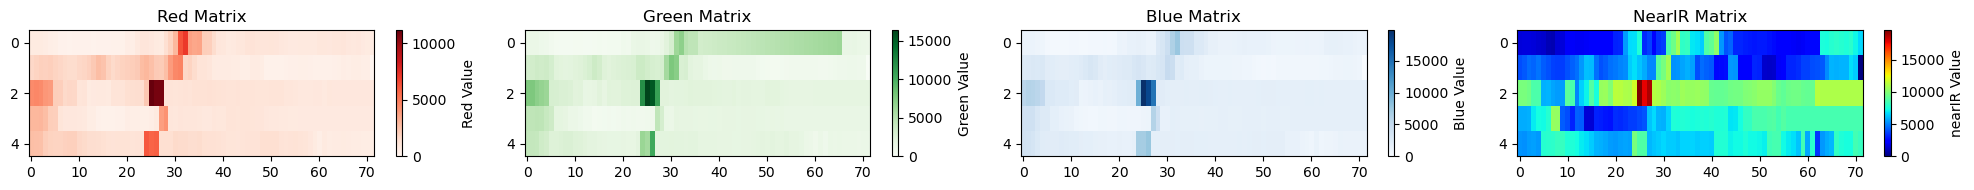

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize empty matrices to store the green, red, and blue values for each batch
green_matrix = np.zeros((5, 72), dtype=float)
red_matrix = np.zeros((5, 72), dtype=float)
blue_matrix = np.zeros((5, 72), dtype=float)
nearIR_matrix = np.zeros((5, 72), dtype=float)

# Iterate over each batch
for batch_index in range(5):
    # Extract the green, red, and blue spectrum data for the current batch
    green_column = 'irradiance_510nm_green_irradiance_uW_per_cm_squared'
    red_column = 'irradiance_645nm_red_irradiance_uW_per_cm_squared'
    blue_column = 'irradiance_435nm_blue_irradiance_uW_per_cm_squared'
    nearIR_column = 'irradiance_810nm_lightgray_irradiance_uW_per_cm_squared'
    
    green_data = df[df['batch'] == batch_index][green_column].values
    red_data = df[df['batch'] == batch_index][red_column].values
    blue_data = df[df['batch'] == batch_index][blue_column].values
    nearIR_data = df[df['batch'] == batch_index][nearIR_column].values
    
    # Populate the matrices for the current batch
    green_matrix[batch_index, :len(green_data)] = green_data
    red_matrix[batch_index, :len(red_data)] = red_data
    blue_matrix[batch_index, :len(blue_data)] = blue_data
    nearIR_matrix[batch_index, :len(nearIR_data)] = nearIR_data

# Visualize the RGB image
plt.figure(figsize=(20, 2))
plt.subplot(1, 4, 1)
plt.imshow(red_matrix, cmap='Reds', aspect='auto')
plt.title('Red Matrix')
plt.colorbar(label='Red Value')

plt.subplot(1, 4, 2)
plt.imshow(green_matrix, cmap='Greens', aspect='auto')
plt.title('Green Matrix')
plt.colorbar(label='Green Value')

plt.subplot(1, 4, 3)
plt.imshow(blue_matrix, cmap='Blues', aspect='auto')
plt.title('Blue Matrix')
plt.colorbar(label='Blue Value')

plt.subplot(1, 4, 4)
plt.imshow(nearIR_matrix, cmap='jet', aspect='auto')
plt.title('NearIR Matrix')
plt.colorbar(label='nearIR Value')

plt.tight_layout()
plt.show()


# Now polulate each row by the proper number of readings:

        num_readings = {
            0: 72,
            1: 71,
            2: 64,
            3: 57,
            4: 72
        }[i]


# Plots are Right Side up:

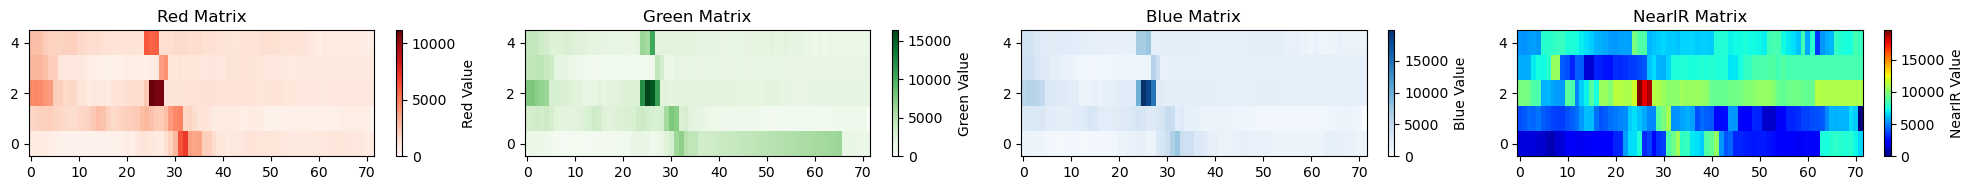

In [21]:
# Visualize the RGB image
plt.figure(figsize=(20, 2))

# Plot for Red Matrix
plt.subplot(1, 4, 1)
plt.imshow(red_matrix, cmap='Reds', aspect='auto')
plt.title('Red Matrix')
plt.colorbar(label='Red Value')
plt.gca().invert_yaxis()  # Invert y-axis to have batch 0 at the bottom
#plt.yticks(np.arange(5), np.arange(4, -1, -1))  # Set y-axis ticks and labels

# Plot for Green Matrix
plt.subplot(1, 4, 2)
plt.imshow(green_matrix, cmap='Greens', aspect='auto')
plt.title('Green Matrix')
plt.colorbar(label='Green Value')
plt.gca().invert_yaxis()  # Invert y-axis to have batch 0 at the bottom
#plt.yticks(np.arange(5), np.arange(4, -1, -1))  # Set y-axis ticks and labels

# Plot for Blue Matrix
plt.subplot(1, 4, 3)
plt.imshow(blue_matrix, cmap='Blues', aspect='auto')
plt.title('Blue Matrix')
plt.colorbar(label='Blue Value')
plt.gca().invert_yaxis()  # Invert y-axis to have batch 0 at the bottom
#plt.yticks(np.arange(5), np.arange(4, -1, -1))  # Set y-axis ticks and labels

# Plot for NearIR Matrix
plt.subplot(1, 4, 4)
plt.imshow(nearIR_matrix, cmap='jet', aspect='auto')
plt.title('NearIR Matrix')
plt.colorbar(label='NearIR Value')
plt.gca().invert_yaxis()  # Invert y-axis to have batch 0 at the bottom
#plt.yticks(np.arange(5), np.arange(4, -1, -1))  # Set y-axis ticks and labels

plt.tight_layout()
plt.show()


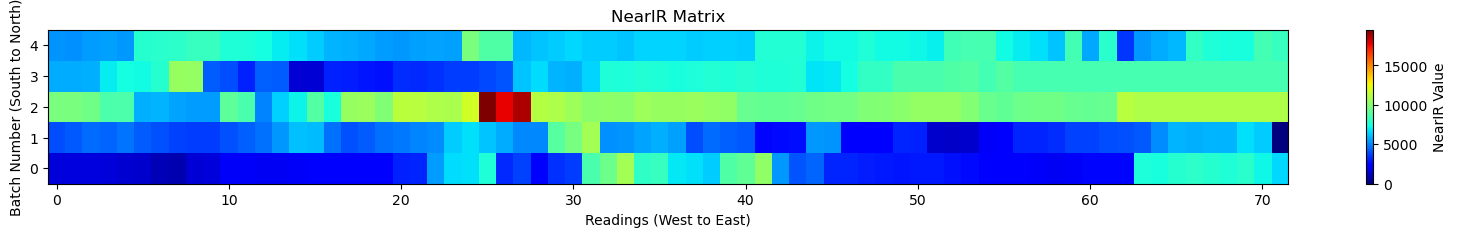

In [22]:
# Plot for NearIR Matrix
plt.figure(figsize=(20, 2))

plt.imshow(nearIR_matrix, cmap='jet', aspect='auto')
plt.title('NearIR Matrix')
plt.colorbar(label='NearIR Value')
plt.xlabel('Readings (West to East)')
plt.ylabel('Batch Number (South to North)')
plt.gca().invert_yaxis()  # Invert y-axis to have batch 0 at the bottom


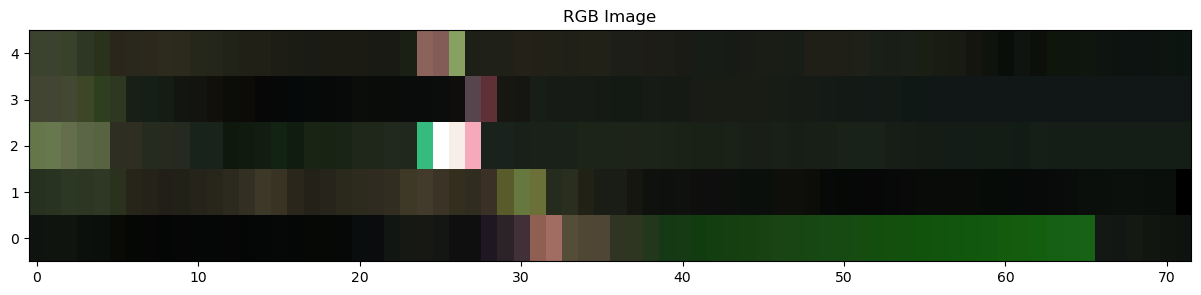

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming red_matrix, green_matrix, and blue_matrix are already populated

# Normalize each matrix to range [0, 1]
red_normalized = red_matrix / np.max(red_matrix)
green_normalized = green_matrix / np.max(green_matrix)
blue_normalized = blue_matrix / np.max(blue_matrix)

# Create the RGB image by stacking the normalized matrices along the third axis
rgb_image = np.stack((red_normalized, green_normalized, blue_normalized), axis=-1)

# Visualize the RGB image with a square figure size of (10, 10)
plt.figure(figsize=(15, 3))
plt.imshow(rgb_image, cmap='CMRmap',aspect='auto')
plt.title('RGB Image')
plt.gca().invert_yaxis()  # Invert y-axis to have batch 0 at the bottom
#plt.axis('off')
plt.show()


---
---
---
# **Now we will apply Normalization to our data per recommendations from Paul Mirel.**

## Load White Standard data taken in same lighting conditions:

### Email from Paul Mirel of NASA, February 5, 2024: 
    It’s general practice to measure a white reference in the same illumination as the sample, and then to measure the sample. The unitless reflectance from the sample is then the sample signal divided by the white reference signal, in each wavelength. Landsat uses a stretch of desert sand, or a huge white tarp!, as a reference. Spectralon is the material of choice for white references, but it’s expensive. We get quite good results with ordinary white Styrofoam (without cover sheets), and are considering using white playground sand, or a plain white felt acrylic blanket. The goal is a material that scatters light equally in all directions, and does not have much, or any, specular shiny reflectance.


## Extract white reading (first reading) and then calibrate all readings to this white card reading:

**The following white is not correct in this example, so we multiply the irradiance data by 0.0001 to mimick what we had at FabLab**

In [24]:
#read the file
file = r'data-front_yard_white.xlsx'
white = pd.read_excel(file,index_col=False)

# Remove leading/trailing whitespaces in column names
white.columns = white.columns.str.strip()
white.head()

device_type software_version   UID  Number        Test  Reading  batch  \
0   STELLA-Q2            2.4.0  6858      30  White Card       31      0   
1   STELLA-Q2            2.4.0  6858      31  White Card       32      0   
2   STELLA-Q2            2.4.0  6858      32  White Card       33      0   
3   STELLA-Q2            2.4.0  6858     101  White Card       30      1   
4   STELLA-Q2            2.4.0  6858     102  White Card       31      1   

   weekday  timestamp_iso8601  decimal_hour  ...  \
0   Monday   20240304T182255Z       18.3819  ...   
1   Monday   20240304T182256Z       18.3822  ...   
2   Monday   20240304T182258Z       18.3828  ...   
3   Monday   20240304T182533Z       18.4258  ...   
4   Monday   20240304T182535Z       18.4264  ...   

   irradiance_900nm_wheat_wavelength_nm  \
0                                   900   
1                                   900   
2                                   900   
3                                   900   
4                                   900   

   irradiance_900nm_wheat_wavelength_uncertainty_nm  \
0                                                10   
1                                                10   
2                                                10   
3                                                10   
4                                                10   

   irradiance_900nm_wheat_irradiance_uW_per_cm_squared  \
0                                            1547.57     
1                                            2130.48     
2                                            2293.29     
3                                            1477.56     
4                                            1608.70     

   irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared  \
0                                            185.709                 
1                                            255.658                 
2                                            275.195                 
3                                            177.307                 
4                                            193.044                 

   irradiance_940nm_gold_wavelength_nm  \
0                                  940   
1                                  940   
2                                  940   
3                                  940   
4                                  940   

   irradiance_940nm_gold_wavelength_uncertainty_nm  \
0                                               10   
1                                               10   
2                                               10   
3                                               10   
4                                               10   

   irradiance_940nm_gold_irradiance_uW_per_cm_squared  \
0                                            975.880    
1                                           1500.000    
2                                           1672.940    
3                                            819.704    
4                                            910.586    

   irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared  \
0                                            117.106                
1                                            180.000                
2                                            200.752                
3                                             98.364                
4                                            109.270                

   battery_voltage  battery_percent  
0             4.14               96  
1             4.14               96  
2             4.15               96  
3             4.14               95  
4             4.14               95  

[5 rows x 86 columns]

**The following white is not correct in this example, so we multiply the irradiance data by 0.0001 to mimick what we had at FabLab**

Replace this white data with actual Fablab white from their ambient lighting.

In [25]:
# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(white.columns))))


def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = white['timestamp_iso8601'][timestamp_index]
    test = white['Test'][timestamp_index]

    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in white.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

            # Define specific colors for certain wavelengths
            if wavelength == '410':
                color = 'purple'
            elif wavelength == '435':
                color = 'blue'
            elif wavelength == '460':
                color = 'dodgerblue'
            elif wavelength == '485':
                color = 'cyan'
            elif wavelength == '510':
                color = 'green'
            elif wavelength == '535':
                color = 'aqumarine'
            elif wavelength == '560':
                color = 'limegreen'
            elif wavelength == '585':
                color = 'yellow'
            elif wavelength == '610':
                color = 'orange'
            elif wavelength == '645':
                color = 'red'
            elif wavelength == '680':
                color = 'black'
            elif wavelength == '705':
                color = 'brown'
            elif wavelength == '730':
                color = 'gray'
            elif wavelength == '760':
                color = 'silver'
            elif wavelength == '810':
                color = 'lightgray'
            elif wavelength == '860':
                color = 'linen'
            elif wavelength == '900':
                color = 'wheat'
            elif wavelength == '940':
                color = 'gold'

            # Map custom colors to standard recognized color names
            # color = map_color(color)

            # Check if the column exists before using it
            if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in white.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in white.columns:
                wavelength_data = white[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][timestamp_index]
                irradiance_data = white[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][timestamp_index]
                wavelength_uncertainty = white[f'irradiance_{wavelength}nm_{color}_wavelength_uncertainty_nm'][timestamp_index]
                irradiance_uncertainty = white[f'irradiance_{wavelength}nm_{color}_irradiance_uncertainty_uW_per_cm_squared'][timestamp_index]

                # Create a Gaussian distribution
                x_values = np.linspace(wavelength_data - 3 * wavelength_uncertainty,
                                       wavelength_data + 3 * wavelength_uncertainty, 100)
                y_values = irradiance_data * np.exp(-0.5 * ((x_values - wavelength_data) / wavelength_uncertainty) ** 2)

                # Plot Gaussian distribution
                plt.plot(x_values, y_values, label=f'{wavelength}nm - {color}', linestyle='--', linewidth=2, color=color)

                # Plot data point with error bars
                plt.errorbar(wavelength_data, irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty,
                             linestyle='', marker='o', markersize=5, capsize=5, color=color)

                  
   # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum',label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet',label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue',label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green',label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow',label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange',label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red',label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')


    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.xlim(350,1000)
    #plt.ylim(0,30)    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid()
    #plt.title(f'Irradiance Over Wavelength by Timestamp {timestamp} for White Standard')
    plt.title(f"Raw White Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {white['Test']}")


timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(white) - 1, step=1, description='Timestamp Index')
batch_slider = widgets.IntSlider(value=0, min=0, max=20, step=1, description='Batch Index')

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider, batch_index=batch_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', max=13), Output()), _dom_classes=('wid…

**In the above plot for our white standard, there is quite a range of magnitudes across the specrtum. This could be instrument bias.**

## Calculate Scaling Factor per Wavelength:

In [26]:
# Extract the white standard readings from the DataFrame

# Initialize white_standard_readings as an empty dictionary
white_standard_readings = {}

# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(white.columns))))

timestamp = white['timestamp_iso8601'][0]

for wavelength in wavelengths:
    wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
    wavelength_columns = [col for col in white.columns if re.search(wavelength_pattern, col)]

    for column in wavelength_columns:
        color = 'black'  # Default color for wavelengths not explicitly defined

        # Define specific colors for certain wavelengths
        if wavelength == '410':
            color = 'purple'
        elif wavelength == '435':
            color = 'blue'
        elif wavelength == '460':
            color = 'dodgerblue'
        elif wavelength == '485':
            color = 'cyan'
        elif wavelength == '510':
            color = 'green'
        elif wavelength == '535':
            color = 'aqumarine'
        elif wavelength == '560':
            color = 'limegreen'
        elif wavelength == '585':
            color = 'yellow'
        elif wavelength == '610':
            color = 'orange'
        elif wavelength == '645':
            color = 'red'
        elif wavelength == '680':
            color = 'black'
        elif wavelength == '705':
            color = 'brown'
        elif wavelength == '730':
            color = 'gray'
        elif wavelength == '760':
            color = 'silver'
        elif wavelength == '810':
            color = 'lightgray'
        elif wavelength == '860':
            color = 'linen'
        elif wavelength == '900':
            color = 'wheat'
        elif wavelength == '940':
            color = 'gold'

        # Map custom colors to standard recognized color names
        # color = map_color(color)

        # Check if the column exists before using it
        if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in white.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in white.columns:
            #wavelength_data = white[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][0]
            #irradiance_data = white[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][0]
            white_reading =  white[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][0]
            white_standard_readings[wavelength] = white_reading
            
    #print()
    #print('1) This is the raw white card readings from our white card calibration:',white_reading, 'at', wavelength,'nm.')
  
    #print()
    #print('2) These are our white card standard wavelengths and readings from our spectrometer:',white_standard_readings,'used with wavelength', wavelength,'nm.')



# Calculate scaling factors using only white standard readings
scaling_factors = {}
for wavelength, white_reading in white_standard_readings.items():
    # Assuming the minimum possible reading is zero
    scaling_factor = 1.0 / white_reading
    scaling_factors[wavelength] = scaling_factor

    
    
#print()
#print('3) These are our wavelengths and white scaling factors:',scaling_factors)

# Print scaling factors
print()
print("Scaling Factors:")
for wavelength, factor in scaling_factors.items():
    print(f"4) These are our final wavelength and scaling factors per wavelength {wavelength}nm: {factor}")

    
#print([scaling_factors[factor] for wavelength in wavelengths])    


Scaling Factors:
4) These are our final wavelength and scaling factors per wavelength 410nm: 0.00026505302385742267
4) These are our final wavelength and scaling factors per wavelength 435nm: 0.0002335128268595794
4) These are our final wavelength and scaling factors per wavelength 460nm: 0.00020582526669808934
4) These are our final wavelength and scaling factors per wavelength 485nm: 0.00022149620687745723
4) These are our final wavelength and scaling factors per wavelength 510nm: 0.0003250679391992926
4) These are our final wavelength and scaling factors per wavelength 560nm: 0.0008084989408663876
4) These are our final wavelength and scaling factors per wavelength 585nm: 0.0005540043433940522
4) These are our final wavelength and scaling factors per wavelength 610nm: 0.00024115910713252173
4) These are our final wavelength and scaling factors per wavelength 645nm: 0.0003472101663136697
4) These are our final wavelength and scaling factors per wavelength 680nm: 0.000177892261330847

## After White Card Correction where first sample is the White Calibration Card data:

In [27]:
# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(df.columns))))

def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = df['timestamp_iso8601'][timestamp_index]
    test = df['Test'][timestamp_index]

    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

        # Define specific colors for certain wavelengths
            if wavelength == '410':
                color = 'purple'
            elif wavelength == '435':
                color = 'blue'
            elif wavelength == '460':
                color = 'dodgerblue'
            elif wavelength == '485':
                color = 'cyan'
            elif wavelength == '510':
                color = 'green'
            elif wavelength == '535':
                color = 'aqumarine'
            elif wavelength == '560':
                color = 'limegreen'
            elif wavelength == '585':
                color = 'yellow'
            elif wavelength == '610':
                color = 'orange'
            elif wavelength == '645':
                color = 'red'
            elif wavelength == '680':
                color = 'black'
            elif wavelength == '705':
                color = 'brown'
            elif wavelength == '730':
                color = 'gray'
            elif wavelength == '760':
                color = 'silver'
            elif wavelength == '810':
                color = 'lightgray'
            elif wavelength == '860':
                color = 'linen'
            elif wavelength == '900':
                color = 'wheat'
            elif wavelength == '940':
                color = 'gold'

            # Check if the column exists before using it
            if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in df.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in df.columns:
                wavelength_data = df[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][timestamp_index]
                irradiance_data = df[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][timestamp_index]
                wavelength_uncertainty = df[f'irradiance_{wavelength}nm_{color}_wavelength_uncertainty_nm'][timestamp_index]
                irradiance_uncertainty = df[f'irradiance_{wavelength}nm_{color}_irradiance_uncertainty_uW_per_cm_squared'][timestamp_index]

                # Apply scaling factor to correct irradiance data
                scaling_factor = scaling_factors[wavelength]
                #print(scaling_factor)
                corrected_irradiance_data = irradiance_data * scaling_factor

                
                # Create a Gaussian distribution
                x_values = np.linspace(wavelength_data - 3 * wavelength_uncertainty,
                                       wavelength_data + 3 * wavelength_uncertainty, 100)
                y_values = corrected_irradiance_data * np.exp(-0.5 * ((x_values - wavelength_data) / wavelength_uncertainty) ** 2)

                # Plot Gaussian distribution
                plt.plot(x_values, y_values, label=f'{wavelength}nm - {color}', linestyle='--', linewidth=2, color=color)

                # Plot data point with error bars
                #plt.errorbar(wavelength_data, corrected_irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty,
                #             linestyle='', marker='o', markersize=5, capsize=5, color=color)
                plt.errorbar(wavelength_data, corrected_irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty*scaling_factor,
                              linestyle='', marker='o', markersize=5, capsize=5, color=color)

                
                
                
                # Plot data point with error bars (same as before)
                  
   # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum',label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet',label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue',label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green',label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow',label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange',label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red',label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')


    # Display the plot
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Corrected Irradiance (uW/cm^2)')  # Updated ylabel to reflect correction
    plt.xlim(350,1000)
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid()
    #plt.title(f'White Card Corrected Irradiance Over Wavelength by Grass Reading {test} for Backyard')
    plt.title(f"Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {df['Test']}")




                  

timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(df) - 1, step=1, description='Timestamp Index')
batch_slider = widgets.IntSlider(value=0, min=0, max=20, step=1, description='Batch Index')

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider, batch_index=batch_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', max=358), Output()), _dom_classes=('wi…

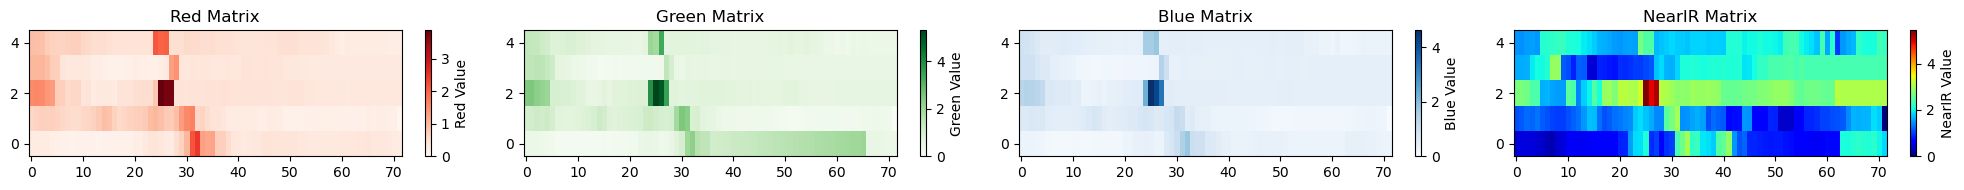

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize empty matrices to store the green, red, and blue values for each batch
green_matrix = np.zeros((5, 72), dtype=float)
red_matrix = np.zeros((5, 72), dtype=float)
blue_matrix = np.zeros((5, 72), dtype=float)
nearIR_matrix = np.zeros((5, 72), dtype=float)

# Iterate over each batch
for batch_index in range(5):
    # Extract the green, red, and blue spectrum data for the current batch
    green_column = 'irradiance_510nm_green_irradiance_uW_per_cm_squared'
    red_column = 'irradiance_645nm_red_irradiance_uW_per_cm_squared'
    blue_column = 'irradiance_435nm_blue_irradiance_uW_per_cm_squared'
    nearIR_column = 'irradiance_810nm_lightgray_irradiance_uW_per_cm_squared'
   
    '''
    green_data = df[df['batch'] == batch_index][green_column].values
    red_data = df[df['batch'] == batch_index][red_column].values
    blue_data = df[df['batch'] == batch_index][blue_column].values
    nearIR_data = df[df['batch'] == batch_index][nearIR_column].values*
    '''
    
    
    green_data = df[df['batch'] == batch_index][green_column].values*0.0003250679391992926
    red_data = df[df['batch'] == batch_index][red_column].values* 0.0003472101663136697
    blue_data = df[df['batch'] == batch_index][blue_column].values* 0.0002335128268595794
    nearIR_data = df[df['batch'] == batch_index][nearIR_column].values*0.00027840186195165275
    #print(nearIR_data)
    
    # Populate the matrices for the current batch
    green_matrix[batch_index, :len(green_data)] = green_data
    red_matrix[batch_index, :len(red_data)] = red_data
    blue_matrix[batch_index, :len(blue_data)] = blue_data
    nearIR_matrix[batch_index, :len(nearIR_data)] = nearIR_data

# Visualize the RGB image
plt.figure(figsize=(20, 2))

# Plot for Red Matrix
plt.subplot(1, 4, 1)
plt.imshow(red_matrix, cmap='Reds', aspect='auto')
plt.title('Red Matrix')
plt.colorbar(label='Red Value')
plt.gca().invert_yaxis()  # Invert y-axis to have batch 0 at the bottom
#plt.yticks(np.arange(5), np.arange(4, -1, -1))  # Set y-axis ticks and labels

# Plot for Green Matrix
plt.subplot(1, 4, 2)
plt.imshow(green_matrix, cmap='Greens', aspect='auto')
plt.title('Green Matrix')
plt.colorbar(label='Green Value')
plt.gca().invert_yaxis()  # Invert y-axis to have batch 0 at the bottom
#plt.yticks(np.arange(5), np.arange(4, -1, -1))  # Set y-axis ticks and labels

# Plot for Blue Matrix
plt.subplot(1, 4, 3)
plt.imshow(blue_matrix, cmap='Blues', aspect='auto')
plt.title('Blue Matrix')
plt.colorbar(label='Blue Value')
plt.gca().invert_yaxis()  # Invert y-axis to have batch 0 at the bottom
#plt.yticks(np.arange(5), np.arange(4, -1, -1))  # Set y-axis ticks and labels

# Plot for NearIR Matrix
plt.subplot(1, 4, 4)
plt.imshow(nearIR_matrix, cmap='jet', aspect='auto')
plt.title('NearIR Matrix')
plt.colorbar(label='NearIR Value')
plt.gca().invert_yaxis()  # Invert y-axis to have batch 0 at the bottom
#plt.yticks(np.arange(5), np.arange(4, -1, -1))  # Set y-axis ticks and labels

plt.tight_layout()
plt.show()

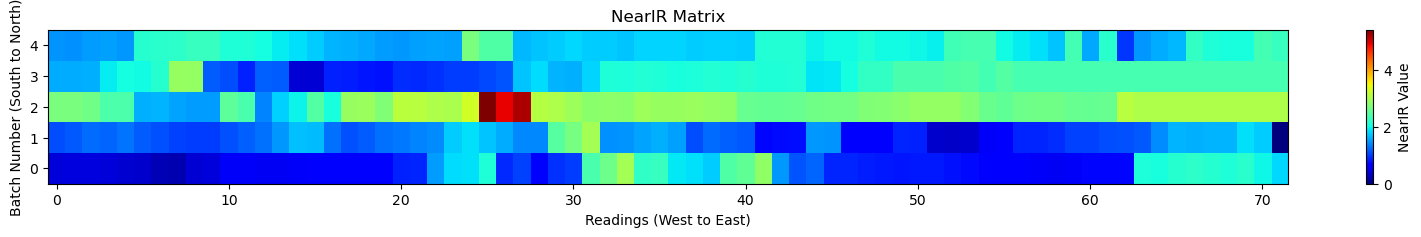

In [29]:
# Plot for NearIR Matrix
plt.figure(figsize=(20, 2))

plt.imshow(nearIR_matrix, cmap='jet', aspect='auto')
plt.title('NearIR Matrix')
plt.colorbar(label='NearIR Value')
plt.xlabel('Readings (West to East)')
plt.ylabel('Batch Number (South to North)')
plt.gca().invert_yaxis()  # Invert y-axis to have batch 0 at the bottom


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


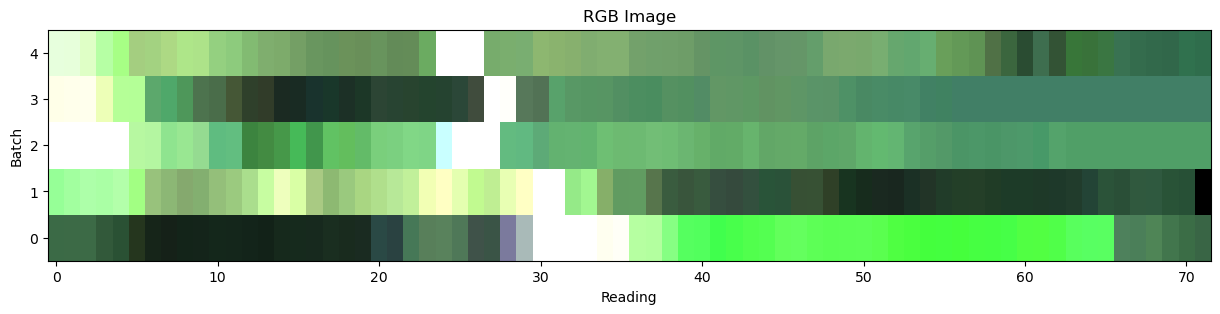

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming red_matrix, green_matrix, and blue_matrix are already populated


# Normalize each matrix to range [0, 1]
red_normalized = red_matrix / np.max(red_matrix)
green_normalized = green_matrix / np.max(green_matrix)
blue_normalized = blue_matrix / np.max(blue_matrix)



# Create the RGB image by stacking the normalized matrices along the third axis
#rgb_image = np.stack((red_normalized, green_normalized, blue_normalized), axis=-1)
rgb_image = np.stack((red_matrix, green_matrix, blue_matrix), axis=-1)

# Visualize the RGB image with a square figure size of (10, 10)
plt.figure(figsize=(15, 3))
plt.imshow(rgb_image, cmap='CMRmap',aspect='auto')
plt.title('RGB Image')
plt.xlabel("Reading")
plt.ylabel("Batch")
plt.gca().invert_yaxis()  # Invert y-axis to have batch 0 at the bottom
#plt.axis('off')
plt.show()


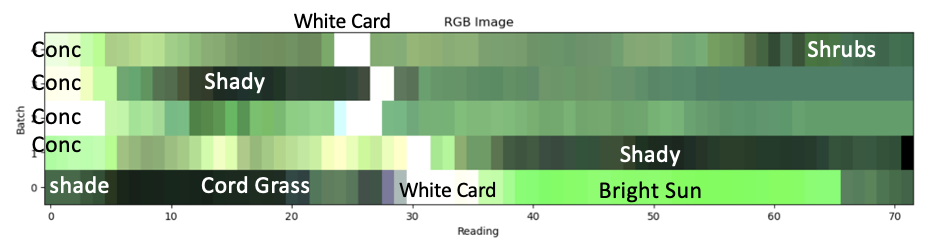

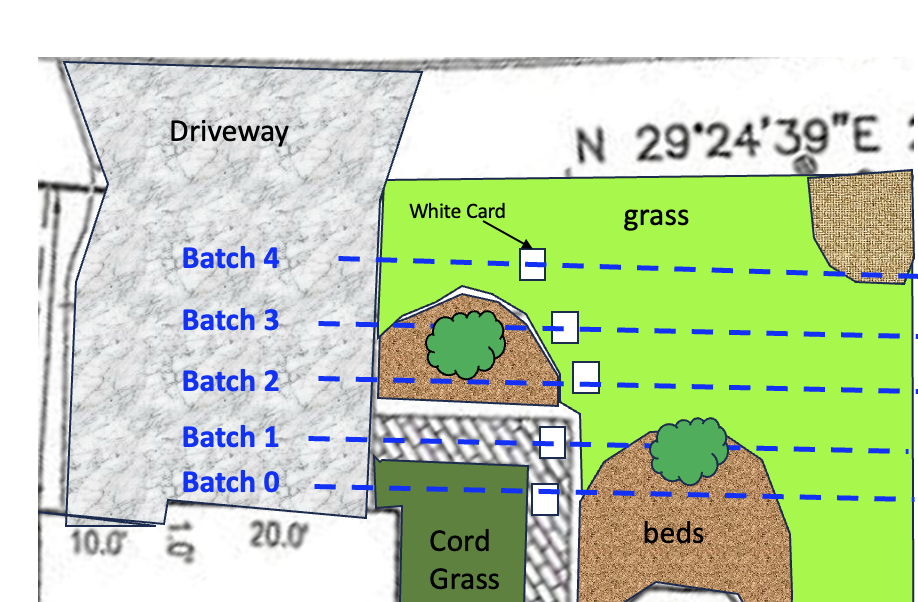

## Qc White Card Correction Factors being used

In [32]:
# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(df.columns))))

def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = df['timestamp_iso8601'][timestamp_index]
    test = df['Test'][timestamp_index]

    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

        # Define specific colors for certain wavelengths
            if wavelength == '410':
                color = 'purple'
            elif wavelength == '435':
                color = 'blue'
            elif wavelength == '460':
                color = 'dodgerblue'
            elif wavelength == '485':
                color = 'cyan'
            elif wavelength == '510':
                color = 'green'
            elif wavelength == '535':
                color = 'aqumarine'
            elif wavelength == '560':
                color = 'limegreen'
            elif wavelength == '585':
                color = 'yellow'
            elif wavelength == '610':
                color = 'orange'
            elif wavelength == '645':
                color = 'red'
            elif wavelength == '680':
                color = 'black'
            elif wavelength == '705':
                color = 'brown'
            elif wavelength == '730':
                color = 'gray'
            elif wavelength == '760':
                color = 'silver'
            elif wavelength == '810':
                color = 'lightgray'
            elif wavelength == '860':
                color = 'linen'
            elif wavelength == '900':
                color = 'wheat'
            elif wavelength == '940':
                color = 'gold'

            # Check if the column exists before using it
            if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in df.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in df.columns:
                wavelength_data = df[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][timestamp_index]
                irradiance_data = df[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][timestamp_index]
                wavelength_uncertainty = df[f'irradiance_{wavelength}nm_{color}_wavelength_uncertainty_nm'][timestamp_index]
                irradiance_uncertainty = df[f'irradiance_{wavelength}nm_{color}_irradiance_uncertainty_uW_per_cm_squared'][timestamp_index]

                # Apply scaling factor to correct irradiance data
                scaling_factor = scaling_factors[wavelength]
                print('Scaling Factor(', scaling_factor, ') x Reading (',irradiance_data, ')=',round(scaling_factor*irradiance_data,2), 'as a unitless calibrated reading')
                corrected_irradiance_data = irradiance_data * scaling_factor

                
                # Create a Gaussian distribution
                x_values = np.linspace(wavelength_data - 3 * wavelength_uncertainty,
                                       wavelength_data + 3 * wavelength_uncertainty, 100)
                y_values = corrected_irradiance_data * np.exp(-0.5 * ((x_values - wavelength_data) / wavelength_uncertainty) ** 2)

                # Plot Gaussian distribution
                plt.plot(x_values, y_values, label=f'{wavelength}nm - {color}', linestyle='--', linewidth=2, color=color)

                # Plot data point with error bars
                #plt.errorbar(wavelength_data, corrected_irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty,
                #             linestyle='', marker='o', markersize=5, capsize=5, color=color)
                plt.errorbar(wavelength_data, corrected_irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty*scaling_factor,
                              linestyle='', marker='o', markersize=5, capsize=5, color=color)

                
                
                
                # Plot data point with error bars (same as before)
                  
   # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum',label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet',label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue',label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green',label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow',label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange',label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red',label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')




    # Display the plot
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Corrected Irradiance (uW/cm^2)')  # Updated ylabel to reflect correction
    plt.xlim(350,1000)
    #plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid()
    plt.title(f"Qc (look at printout of scaling factors) of White Card Corrected Irradiance Over Wavelength by Grass Reading '{test}' from Backyard")
    #plt.title(f"Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {grass['Test']}")




                  

timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(df) - 1, step=1, description='Timestamp Index')
batch_slider = widgets.IntSlider(value=0, min=0, max=20, step=1, description='Batch Index')

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider, batch_index=batch_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', max=358), Output()), _dom_classes=('wi…